In [7]:
from gbsio import read_from_csv
from partition import RelativePartitioner
from gbs import compute_kl_sri

## Read coordinates and values from CSV file.
coords, values = read_from_csv("data/example_data.csv", value_column="hit@1")

## Construct a partitioner that extract neighborhood points.
partitioner = RelativePartitioner(coords, values)

## The index of the center point to evaluate.
idx = 0
center = coords[idx]

## The radius of the neighborhood.
radius = 0.1
scale = 0.05

## Extract neighbood points.
local_coords_list, local_values_list, total_list = partitioner.get_scale_grid(idx, radius, scale)

In [2]:
center

array([ 0.84053838, -1.21585208])

In [3]:
from matplotlib import pyplot as plt

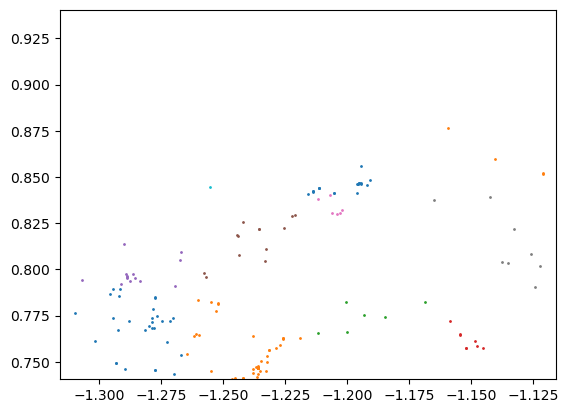

In [4]:
plt.xlim([center[1] - 0.1, center[1] + 0.1])
plt.ylim([center[0] - 0.1, center[0] + 0.1])

for local_coords in local_coords_list:
    plt.scatter(local_coords[:, 1], local_coords[:, 0], s=1)

In [8]:
sris, weights = compute_kl_sri(local_values_list, total_list)

print(sris, weights)

[array([ 0.05887676,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.05101394]), array([-0.0558173 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.07086297]), array([-0.05762378,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.07409124])] [0.18867924528301888, 0.3018867924528302, 0.1320754716981132]


In [9]:
len(sris)

3

# Loss Function

In [1]:
from gbsloss import LogOddsPerformanceTransformer

In [2]:
import numpy as np

In [9]:
bins = np.arange(-1, 2, 0.2)

In [10]:
bins

array([-1.00000000e+00, -8.00000000e-01, -6.00000000e-01, -4.00000000e-01,
       -2.00000000e-01, -2.22044605e-16,  2.00000000e-01,  4.00000000e-01,
        6.00000000e-01,  8.00000000e-01,  1.00000000e+00,  1.20000000e+00,
        1.40000000e+00,  1.60000000e+00,  1.80000000e+00])

In [11]:
logodds = 5 * np.random.rand(100) - 1.5

In [12]:
pt = LogOddsPerformanceTransformer(bins)

In [7]:
logodds_bins = pt.discretize(logodds)

In [10]:
logodds

array([ 2.18224515,  2.0670247 ,  1.38214397, -0.26304588,  1.5198446 ,
        0.52716589, -0.0728492 ,  1.65756571,  2.82565092, -0.57636979,
        0.21916505, -0.08598537,  0.89409411, -0.37481125,  1.24397039,
       -0.74197073,  2.54260534,  3.33194736,  2.4328751 ,  2.1592526 ,
       -0.72462222,  1.04487081,  2.24197924,  0.08566639,  0.02238089,
       -0.78799584,  2.69938846,  1.3361479 ,  1.99528987,  2.31805469,
        1.9490701 ,  1.89112375,  0.4894835 , -0.05696042,  0.28953445,
       -1.        ,  3.06786894, -0.86489699, -0.93973534,  2.51139739,
        1.13749894,  2.77727989,  2.9285661 , -1.        ,  3.22498328,
        0.83632216,  1.675757  , -0.51238421,  0.30834781,  1.04217183,
        2.68058403, -1.        ,  2.20138582,  2.12479679,  2.93881443,
       -0.02800306,  3.42705932,  0.27201644, -1.        ,  3.19616592,
       -1.        ,  2.04564145,  2.51283971,  1.28983498,  0.76262763,
        0.80238604, -0.98709188,  0.22783404,  2.69276998, -1.  

In [11]:
logodds_bins

array([ 1.80000000e+00,  1.80000000e+00,  1.20000000e+00, -4.00000000e-01,
        1.40000000e+00,  4.00000000e-01, -2.00000000e-01,  1.60000000e+00,
        1.80000000e+00, -6.00000000e-01,  2.00000000e-01, -2.00000000e-01,
        8.00000000e-01, -4.00000000e-01,  1.20000000e+00, -8.00000000e-01,
        1.80000000e+00,  1.80000000e+00,  1.80000000e+00,  1.80000000e+00,
       -8.00000000e-01,  1.00000000e+00,  1.80000000e+00, -2.22044605e-16,
       -2.22044605e-16, -8.00000000e-01,  1.80000000e+00,  1.20000000e+00,
        1.80000000e+00,  1.80000000e+00,  1.80000000e+00,  1.80000000e+00,
        4.00000000e-01, -2.00000000e-01,  2.00000000e-01, -1.00000000e+00,
        1.80000000e+00, -1.00000000e+00, -1.00000000e+00,  1.80000000e+00,
        1.00000000e+00,  1.80000000e+00,  1.80000000e+00, -1.00000000e+00,
        1.80000000e+00,  8.00000000e-01,  1.60000000e+00, -6.00000000e-01,
        2.00000000e-01,  1.00000000e+00,  1.80000000e+00, -1.00000000e+00,
        1.80000000e+00,  

In [13]:
logodds_capped = np.ones_like(logodds) * logodds

In [14]:
logodds[logodds < bins[0]] = bins[0]
logodds[logodds > bins[-1]] = bins[-1]

In [15]:
print(logodds - logodds_bins)

[0.         0.         0.18214397 0.13695412 0.1198446  0.12716589
 0.1271508  0.05756571 0.         0.02363021 0.01916505 0.11401463
 0.09409411 0.02518875 0.04397039 0.05802927 0.         0.
 0.         0.         0.07537778 0.04487081 0.         0.08566639
 0.02238089 0.01200416 0.         0.1361479  0.         0.
 0.         0.         0.0894835  0.14303958 0.08953445 0.
 0.         0.13510301 0.06026466 0.         0.13749894 0.
 0.         0.         0.         0.03632216 0.075757   0.08761579
 0.10834781 0.04217183 0.         0.         0.         0.
 0.         0.17199694 0.         0.07201644 0.         0.
 0.         0.         0.         0.08983498 0.16262763 0.00238604
 0.01290812 0.02783404 0.         0.         0.13369848 0.19795294
 0.         0.13264502 0.05220428 0.1874331  0.         0.
 0.18335141 0.         0.01525465 0.18467519 0.0476918  0.03556965
 0.07939079 0.         0.10770629 0.04662652 0.02168673 0.03490633
 0.         0.14078491 0.         0.15674787 0.    

In [3]:
import torch

In [13]:
logodds = 5 * np.random.rand(100) - 1.5

In [14]:
logodds_torch = torch.DoubleTensor(logodds)

In [15]:
logodds_torch

tensor([ 2.1708,  1.7171,  1.2266, -1.0106,  1.2218,  0.8055, -0.9709, -0.1602,
         2.7786, -0.2978,  1.5418,  2.5531,  0.2295,  2.8184,  3.3123,  2.1808,
         1.1415,  2.5220,  0.2915,  1.4278,  0.9093, -0.1450, -0.9862, -0.8970,
        -1.3914, -0.8666,  1.2042,  1.5303, -1.3065, -1.1886, -1.1024,  1.5011,
         2.9677, -1.1093, -0.1810, -0.6777, -0.6691,  0.9490,  2.7731,  3.3300,
         1.5296, -1.1547,  1.9428,  1.1803,  2.2294,  0.2015,  2.3859, -1.4523,
        -0.5457, -1.2883,  0.9133,  3.2924,  0.2944,  1.7034, -1.3066,  3.2647,
        -0.2576,  0.4402,  0.9503,  0.3907,  2.4740,  2.6541,  3.1276,  3.2077,
        -1.3508,  1.1602,  0.0423, -0.8616, -1.2896,  1.1167,  3.1891, -1.2926,
         1.8961,  0.4896,  2.1813,  2.1191, -1.3669,  2.8167, -0.8901,  2.1225,
         3.0437,  1.5669, -1.1075,  0.9974,  0.2842,  1.2204,  3.4845, -1.0627,
        -0.9435,  0.2128,  1.3957,  1.6279,  2.2343,  0.4763,  1.8702,  2.6645,
         3.2777,  1.0421,  2.3684,  3.10

In [17]:
logodds_bins_torch = pt.discretize(logodds_torch, use_gradients=True)

In [18]:
logodds_capped = np.ones_like(logodds) * logodds

In [51]:
logodds

array([ 1.96462046,  2.81799533,  1.83672354,  3.25395699, -0.34531298,
        0.28510405,  3.22353658,  2.63461936, -1.18848632,  3.26941154,
        0.30941522,  3.20302059, -0.48550092,  1.43309891,  0.86306045,
        1.99952023,  0.59622357,  1.56156217, -1.33775309,  0.9635888 ,
       -0.42454517,  1.68818721,  1.65319677,  3.15714254,  1.11916781,
        2.51999167,  2.73885217, -1.27279193,  2.73138353,  0.56048942,
        2.40897417,  0.00495306, -1.30841969,  1.0969658 ,  0.26024525,
       -0.35024136,  1.36857654,  1.23284548,  0.52787308, -0.51560042,
        0.00839243,  2.80089521, -0.75160193,  0.76288643,  2.88560068,
       -0.28616479, -0.77861293,  0.9724349 ,  3.36485842, -0.98923025,
        3.42611542, -0.52819736,  2.93060206, -0.59914112,  0.27480701,
        0.58340244,  0.03009745,  3.43617664,  1.76482724,  0.64375543,
       -0.41455782, -0.13605174,  2.48558207, -0.34600639,  2.4433277 ,
       -0.50921268,  0.73019066,  3.11610252,  1.09198529,  3.35

In [54]:
logodds_capped

array([ 1.8       ,  1.8       ,  1.8       ,  1.8       , -0.34531298,
        0.28510405,  1.8       ,  1.8       , -1.        ,  1.8       ,
        0.30941522,  1.8       , -0.48550092,  1.43309891,  0.86306045,
        1.8       ,  0.59622357,  1.56156217, -1.        ,  0.9635888 ,
       -0.42454517,  1.68818721,  1.65319677,  1.8       ,  1.11916781,
        1.8       ,  1.8       , -1.        ,  1.8       ,  0.56048942,
        1.8       ,  0.00495306, -1.        ,  1.0969658 ,  0.26024525,
       -0.35024136,  1.36857654,  1.23284548,  0.52787308, -0.51560042,
        0.00839243,  1.8       , -0.75160193,  0.76288643,  1.8       ,
       -0.28616479, -0.77861293,  0.9724349 ,  1.8       , -0.98923025,
        1.8       , -0.52819736,  1.8       , -0.59914112,  0.27480701,
        0.58340244,  0.03009745,  1.8       ,  1.76482724,  0.64375543,
       -0.41455782, -0.13605174,  1.8       , -0.34600639,  1.8       ,
       -0.50921268,  0.73019066,  1.8       ,  1.09198529,  1.8 

In [19]:
logodds_capped[logodds < bins[0]] = bins[0]
logodds_capped[logodds > bins[-1]] = bins[-1]

In [20]:
logodds_bins_torch

tensor([ 1.8000e+00,  1.6000e+00,  1.2000e+00, -1.0000e+00,  1.2000e+00,
         8.0000e-01, -1.0000e+00, -2.0000e-01,  1.8000e+00, -4.0000e-01,
         1.4000e+00,  1.8000e+00,  2.0000e-01,  1.8000e+00,  1.8000e+00,
         1.8000e+00,  1.0000e+00,  1.8000e+00,  2.0000e-01,  1.4000e+00,
         8.0000e-01, -2.0000e-01, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00,  1.2000e+00,  1.4000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00,  1.4000e+00,  1.8000e+00, -1.0000e+00, -2.0000e-01,
        -8.0000e-01, -8.0000e-01,  8.0000e-01,  1.8000e+00,  1.8000e+00,
         1.4000e+00, -1.0000e+00,  1.8000e+00,  1.0000e+00,  1.8000e+00,
         2.0000e-01,  1.8000e+00, -1.0000e+00, -6.0000e-01, -1.0000e+00,
         8.0000e-01,  1.8000e+00,  2.0000e-01,  1.6000e+00, -1.0000e+00,
         1.8000e+00, -4.0000e-01,  4.0000e-01,  8.0000e-01,  2.0000e-01,
         1.8000e+00,  1.8000e+00,  1.8000e+00,  1.8000e+00, -1.0000e+00,
         1.0000e+00, -2.2204e-16, -1.0000e+00, -1.0

In [22]:
print(logodds_capped - logodds_bins_torch.numpy())

[0.         0.11710122 0.02657443 0.         0.02176597 0.00552464
 0.02911473 0.03975212 0.         0.10224778 0.1417596  0.
 0.02947756 0.         0.         0.         0.14147079 0.
 0.09148951 0.02776241 0.10932764 0.05500903 0.01381061 0.10303911
 0.         0.13344082 0.00416732 0.13030336 0.         0.
 0.         0.10110281 0.         0.         0.01901981 0.12225069
 0.13094682 0.14897938 0.         0.         0.12962368 0.
 0.         0.18032003 0.         0.00149596 0.         0.
 0.0543067  0.         0.11329725 0.         0.0944335  0.10343849
 0.         0.         0.14238412 0.04015241 0.15028768 0.19070107
 0.         0.         0.         0.         0.         0.1601848
 0.04226345 0.13843498 0.         0.11674842 0.         0.
 0.         0.08955759 0.         0.         0.         0.
 0.1098766  0.         0.         0.16690965 0.         0.19736763
 0.08421101 0.02044237 0.         0.         0.05651434 0.0128017
 0.19572171 0.02788286 0.         0.0762802  0.      

## Loss Initialization

In [1]:
import numpy as np
import torch

In [2]:
from matplotlib import pyplot as plt

In [3]:
from gbsio import read_from_csv
from partition import SSIPartitioner
from gbs import compute_kl_sri

## Read coordinates and values from CSV file.
coords, values = read_from_csv("data/example_data.csv", value_column="hit@1")

values[values==0] += 1e-4
values[values==1] -= 1e-4

## Construct a partitioner that extract neighborhood points.
partitioner = SSIPartitioner(coords, values)

In [4]:
from gbsloss import MarkedSSILoss, LogOddsPerformanceTransformer

In [5]:
bins = np.arange(-10, 10.1, 1.0)
pt = LogOddsPerformanceTransformer(bins)

In [6]:
loss = MarkedSSILoss(partitioner, pt, radius=0.05, n_cls=10, n_neighbor_points=400)

In [7]:
loss.initialize_lookup()

In [21]:
loss.weight_matrix_lookup.shape

(2217, 400, 400)

In [22]:
loss.weight_matrix_lookup[1000]

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

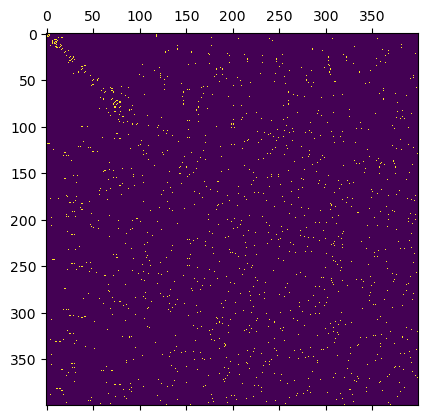

In [23]:
plt.matshow(loss.weight_matrix_lookup[1000])

In [24]:
loss.mean_lookup[1000]

238.06818199858117

In [25]:
loss.std_lookup[1000]

1130.5033522758772

In [26]:
loss.neighborhood_scores_lookup[1000]

array([  9.,   9.,   9.,   9.,   9.,   9., -10.,   9.,   9.,   9.,   9.,
         9.,   9.,   9., -10.,   9.,   9., -10.,   9.,   9., -10.,   9.,
         9.,   9.,   9.,   9., -10.,   9.,   9.,   9.,   9., -10.,   9.,
         9.,   9.,   9., -10., -10.,   9.,   9., -10.,   9., -10.,   9.,
         9., -10.,   9.,   9.,   9.,   9., -10.,   9., -10.,   9.,   9.,
         9., -10.,   9.,   9.,   9., -10.,   9., -10.,   9.,   9.,   9.,
         9.,   9.,   9.,   9.,   9., -10.,   9.,   9.,   9.,   9.,   9.,
         9., -10.,   9., -10.,   9.,   9.,   9.,   9.,   9., -10.,   9.,
         9.,   9., -10.,   9., -10.,   9.,   9., -10.,   9.,   9.,   9.,
         9.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,
        -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,
        -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,
        -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,
        -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -3.,  -

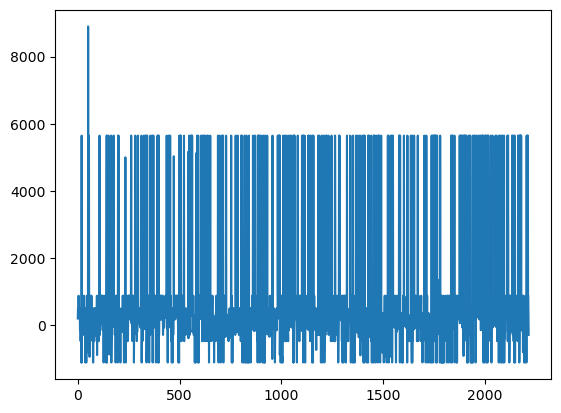

In [10]:
plt.plot(loss.mean_lookup)

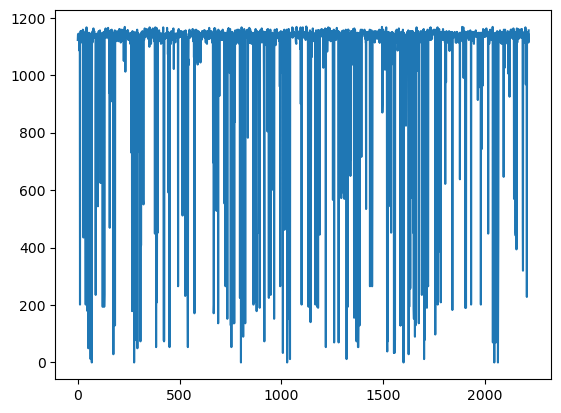

In [11]:
plt.plot(loss.std_lookup)

In [1]:
import torch
from torch.distributions import Normal

# Create a Gaussian distribution with mean 0 and standard deviation 1
dist = Normal(loc=loc, scale=scale) 

NameError: name 'loc' is not defined

238.06818199858117 1130.5033522758772 [-2136.331136] tensor([3.8492], dtype=torch.float64)


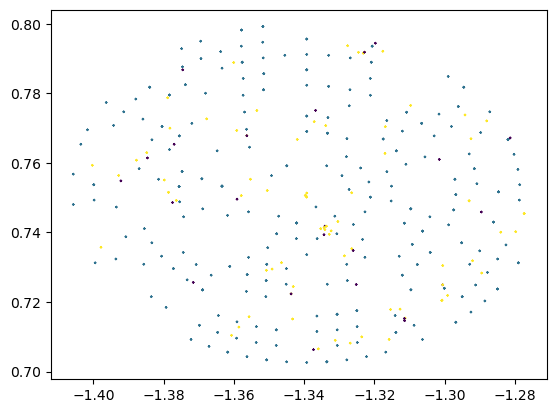

353.0982467450158 1137.887252709643 [-7782.86600651] tensor([28.5065], dtype=torch.float64)


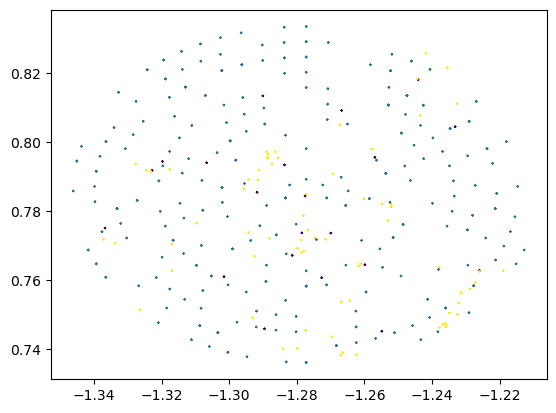

-926.730286659963 990.5660640675279 [-4901.32557332] tensor([12.9836], dtype=torch.float64)


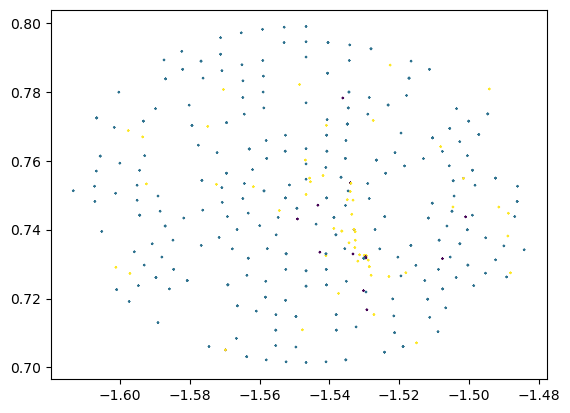

-122.80233786279814 941.7294136681354 [-9386.25712573] tensor([inf], dtype=torch.float64)


C:\Users\zhang\AppData\Local\Temp\ipykernel_17000\2888671017.py:13: RuntimeWarning: divide by zero encountered in log
  print(loc, scale, low, -np.log(cdf_value))


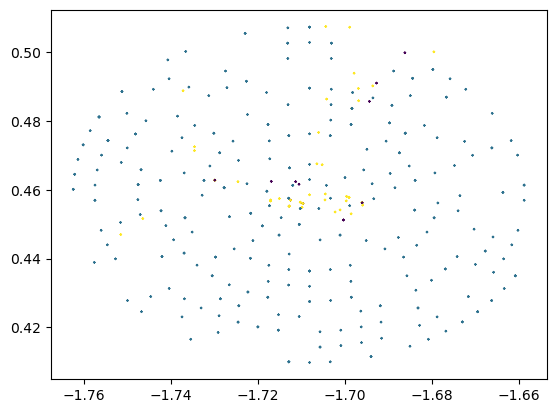

276.584923591936 448.5999202522889 [-302.46765282] tensor([0.7206], dtype=torch.float64)


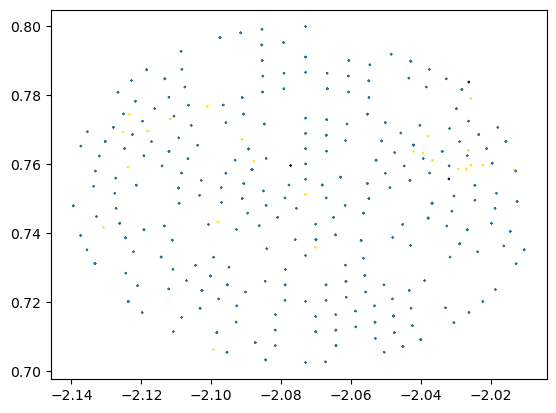

-231.373714059538 242.81084257215534 [-973.47992812] tensor([1.6134], dtype=torch.float64)


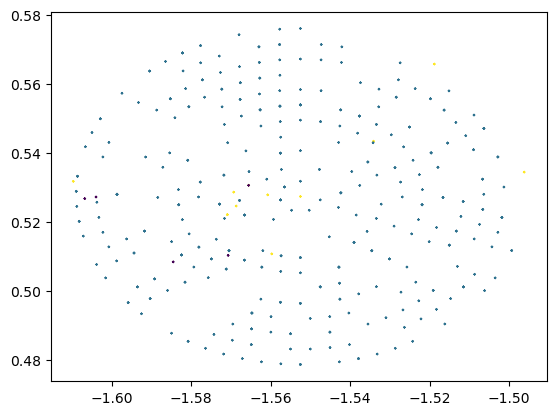

-1121.5516792266253 1150.636013327848 [-13849.73335845] tensor([inf], dtype=torch.float64)


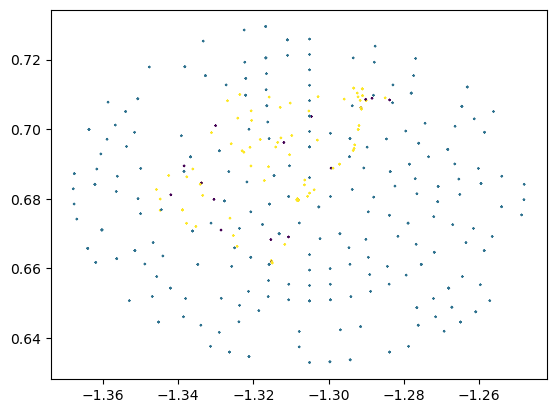

-373.73622300923785 283.40777381906804 [-2010.80744602] tensor([3.5639], dtype=torch.float64)


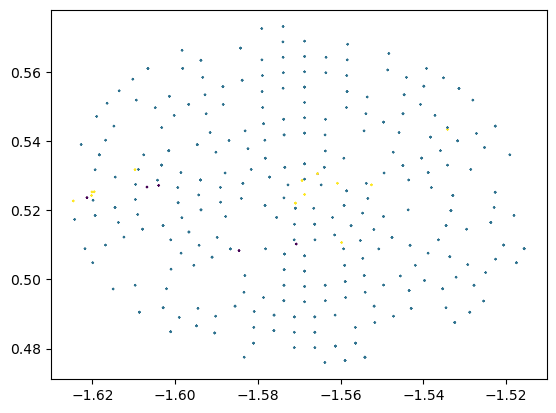

-66.05543671405871 11.81989495908276 [-131.62337343] tensor([0.5363], dtype=torch.float64)


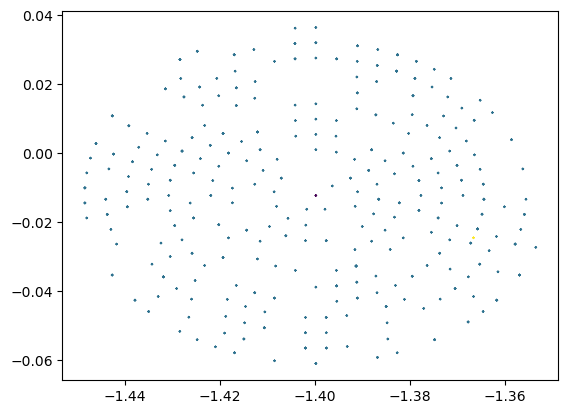

372.9634307826184 438.968782585049 [7.67] tensor([0.3983], dtype=torch.float64)


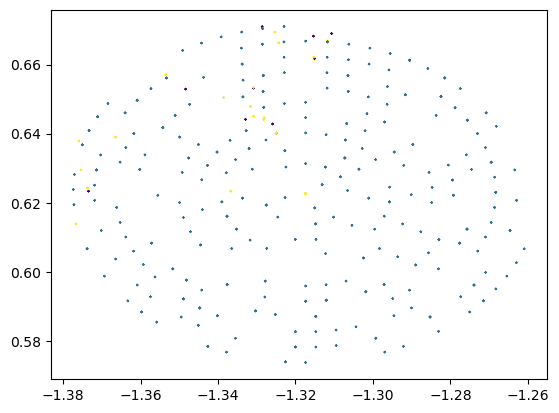

-988.9171038287132 1054.1074910775278 [-6889.15670766] tensor([23.0261], dtype=torch.float64)


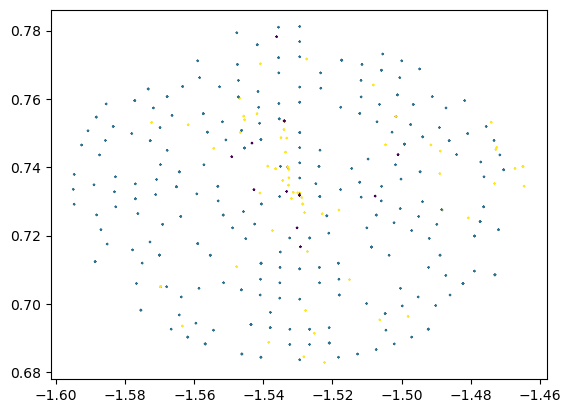

353.0982467450158 1137.887252709643 [-3041.53351276] tensor([6.2334], dtype=torch.float64)


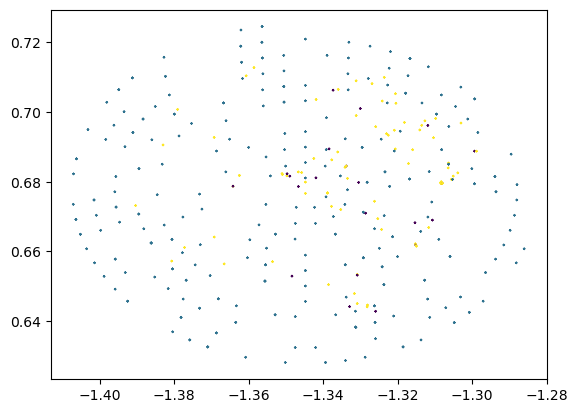

-62.47127892710341 978.3733817927796 [-7422.40255785] tensor([26.2237], dtype=torch.float64)


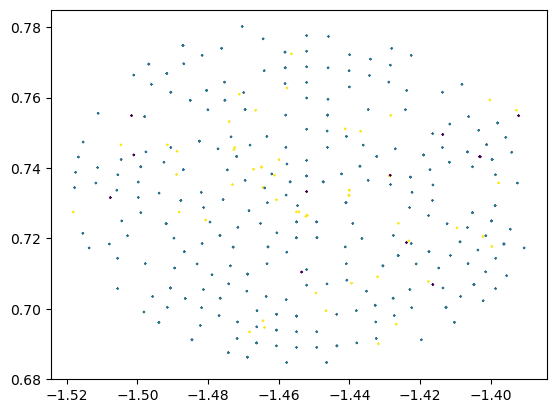

281.4941747754556 1134.2792152460345 [-2882.61272545] tensor([5.7729], dtype=torch.float64)


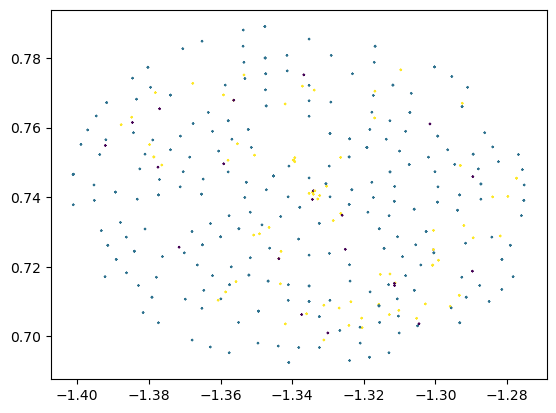

-239.91316151992214 1049.6771197395894 [-8718.67882304] tensor([34.9450], dtype=torch.float64)


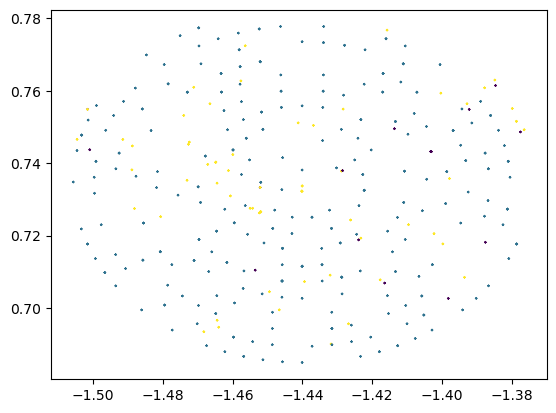

-212.39485837899792 1158.4321347718735 [-13867.20806676] tensor([inf], dtype=torch.float64)


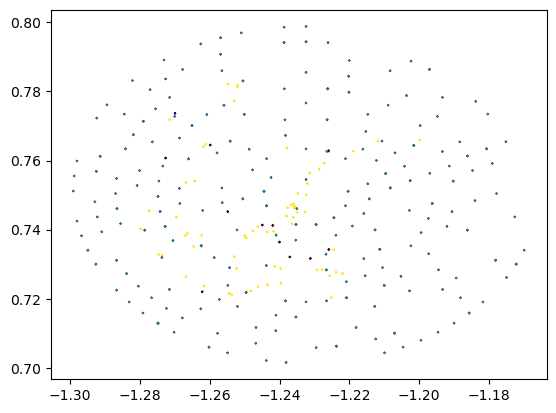

-815.2182795678964 319.5267024835327 [-1870.56155914] tensor([3.2579], dtype=torch.float64)


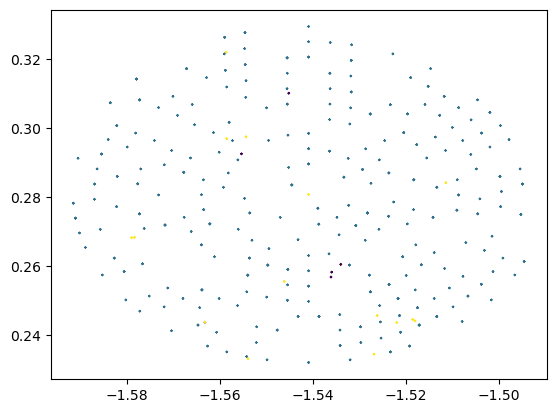

-1834.5879176259396 337.38801741308185 [-5728.54486025] tensor([16.8044], dtype=torch.float64)


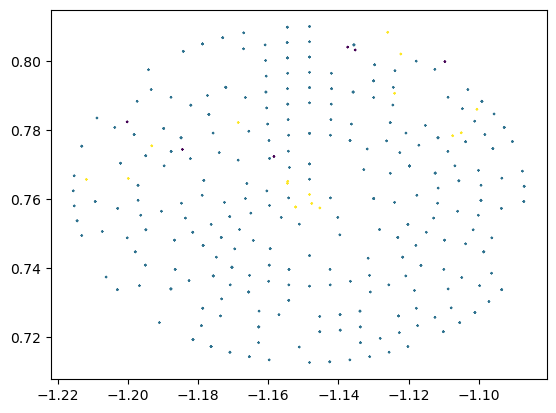

5644.258992500761 1147.7014888571157 [-962.648165] tensor([1.5968], dtype=torch.float64)


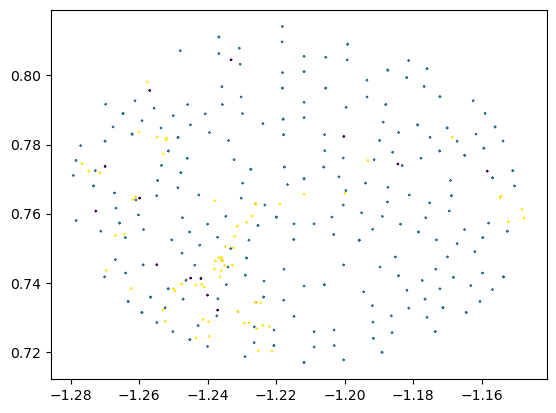

513.3551583108676 397.24573545322204 [-1843.25468338] tensor([3.1999], dtype=torch.float64)


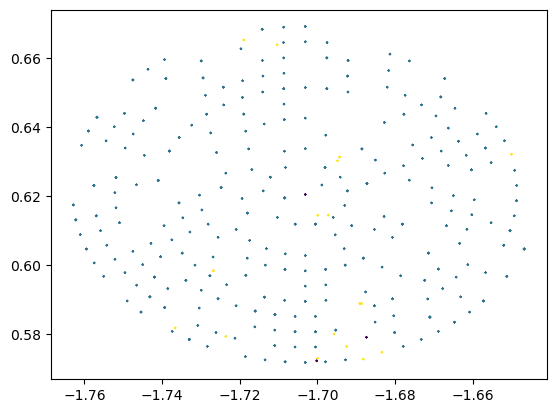

-485.31114394148153 1153.4023412334832 [-11305.46228788] tensor([inf], dtype=torch.float64)


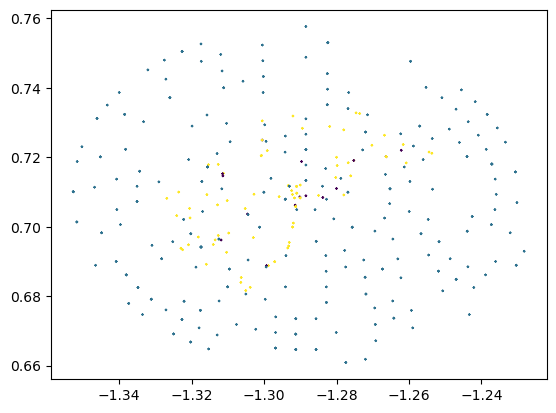

238.06818199858117 1130.5033522758772 [-8097.896136] tensor([30.5819], dtype=torch.float64)


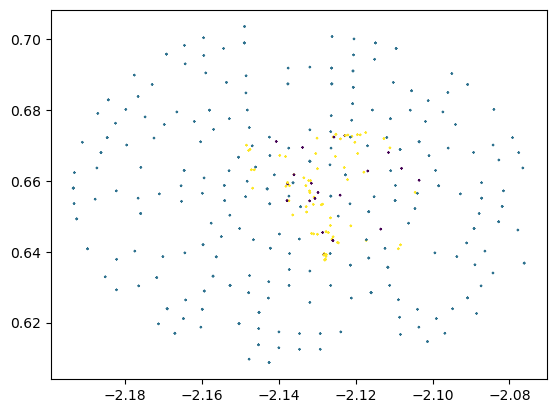

-485.31114394148153 1153.4023412334832 [-9538.14228788] tensor([inf], dtype=torch.float64)


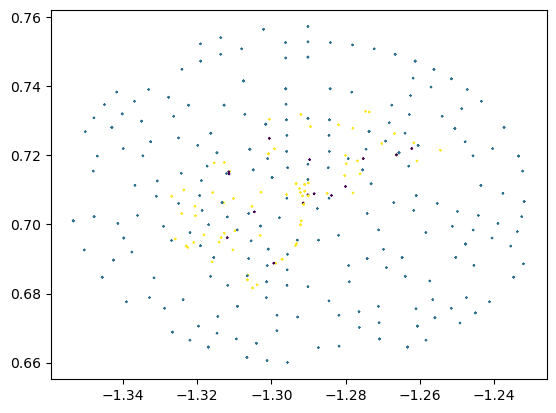

238.06818199858117 1130.5033522758772 [-7844.803636] tensor([28.9088], dtype=torch.float64)


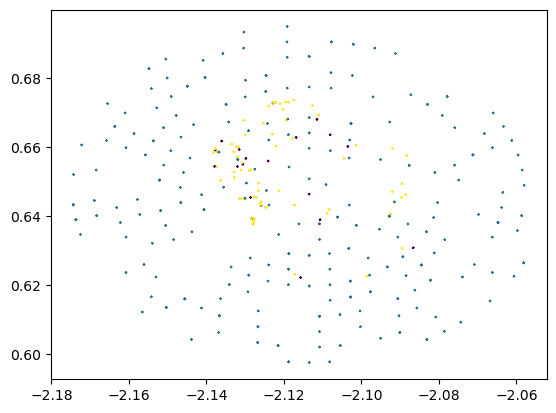

5644.258992500761 1147.7014888571157 [-2533.543165] tensor([4.8243], dtype=torch.float64)


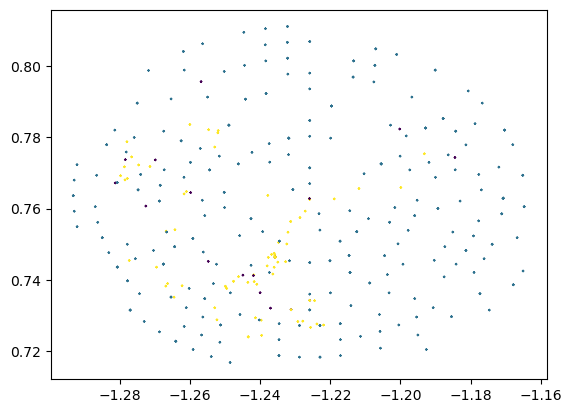

-192.78310502570702 224.2455155539766 [-766.92121005] tensor([1.3090], dtype=torch.float64)


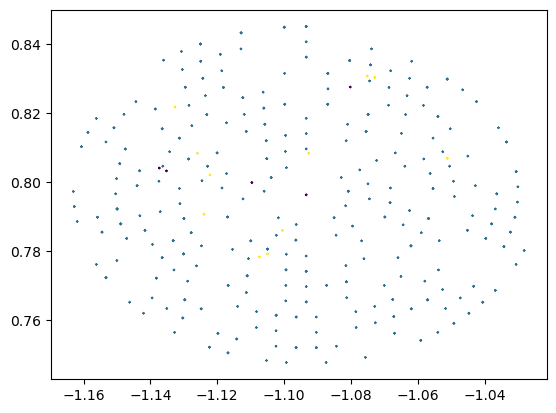

-485.31114394148153 1153.4023412334832 [-9543.86228788] tensor([inf], dtype=torch.float64)


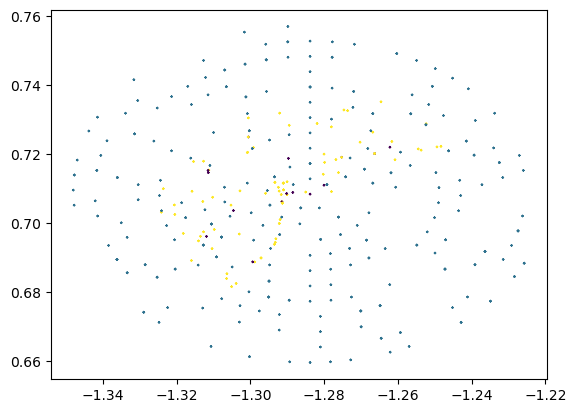

-212.39485837899792 1158.4321347718735 [-11653.23806676] tensor([inf], dtype=torch.float64)


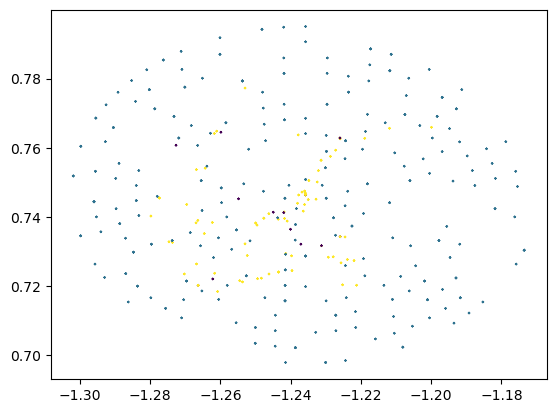

21.250206217420327 822.7774788925132 [-10707.49592507] tensor([inf], dtype=torch.float64)


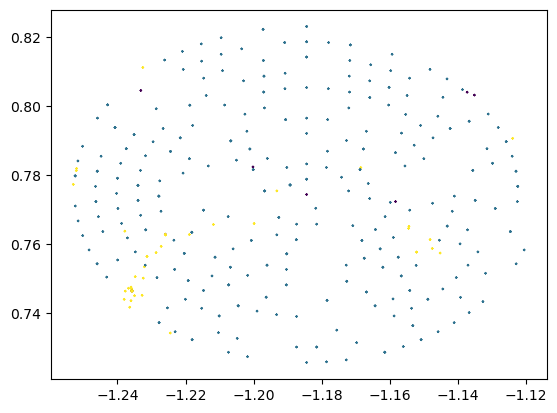

-16.698386135321243 0.0 [-33.27427227] tensor([0.4378], dtype=torch.float64)


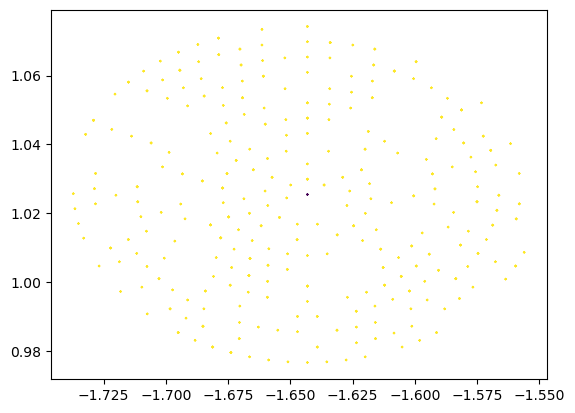

-117.53905024393787 152.0012431611005 [-663.00260674] tensor([1.1659], dtype=torch.float64)


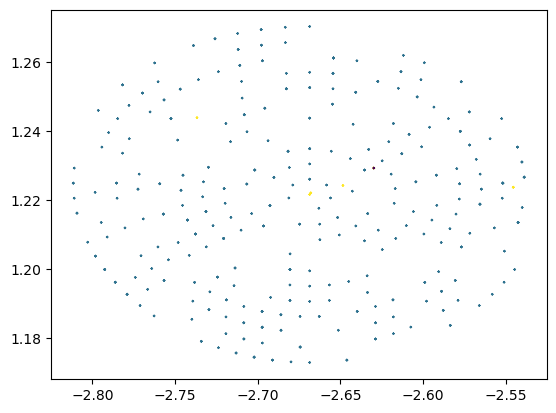

-222.26457730958904 228.1342688065079 [-3078.61415462] tensor([6.3434], dtype=torch.float64)


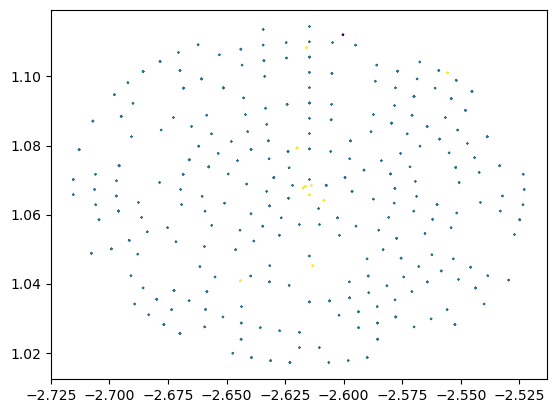

-117.53905024393787 152.0012431611005 [-670.96310049] tensor([1.1767], dtype=torch.float64)


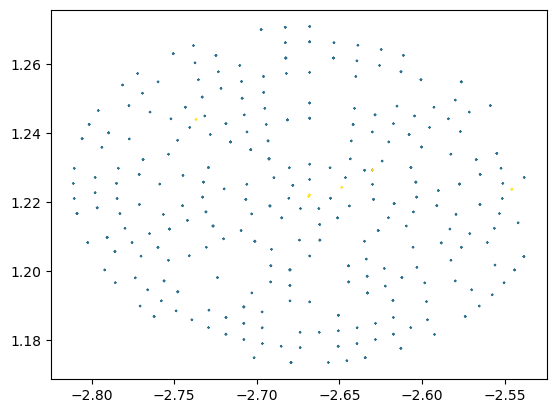

-212.39485837899792 1158.4321347718735 [-12862.24306676] tensor([inf], dtype=torch.float64)


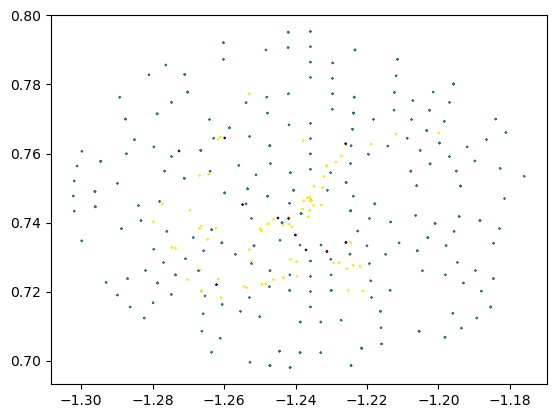

-485.31114394148153 1153.4023412334832 [-13290.74228788] tensor([inf], dtype=torch.float64)


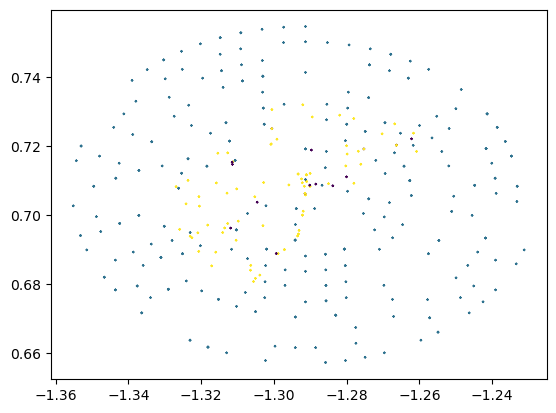

5644.258992500761 1147.7014888571157 [-1502.033165] tensor([2.5177], dtype=torch.float64)


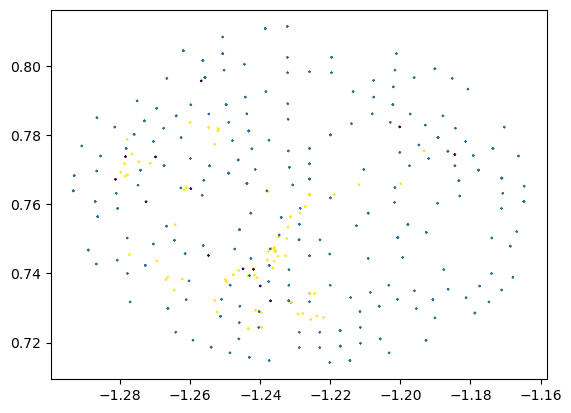

491.79447472881384 1141.327102981437 [-7965.76355054] tensor([29.7024], dtype=torch.float64)


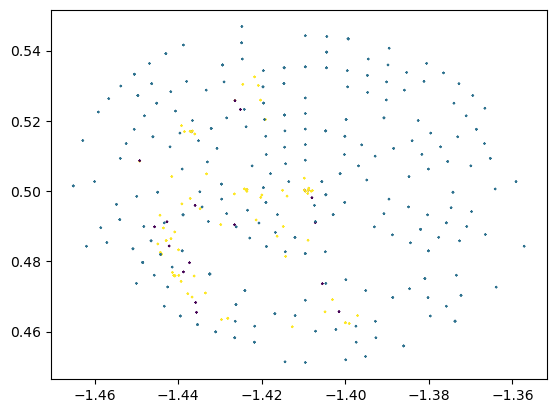

-161.6900643131503 1160.6968973695539 [-16224.51046613] tensor([inf], dtype=torch.float64)


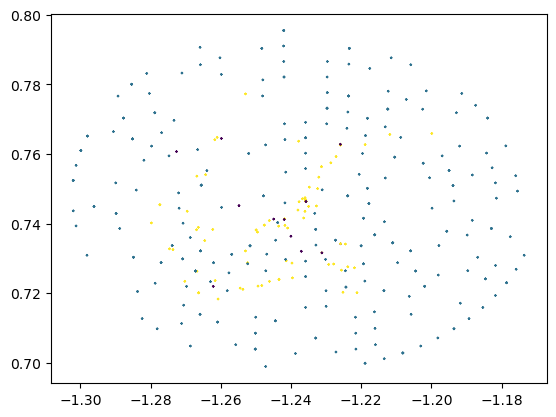

4931.674645593206 993.0619349372878 [3820.71] tensor([-0.6914], dtype=torch.float64)


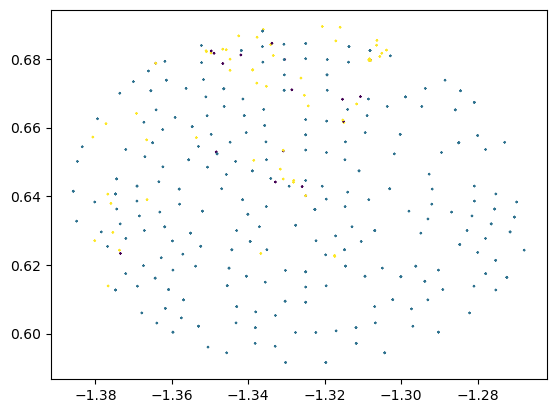

4803.697380095467 952.1543618419179 [4617.11373519] tensor([-0.6930], dtype=torch.float64)


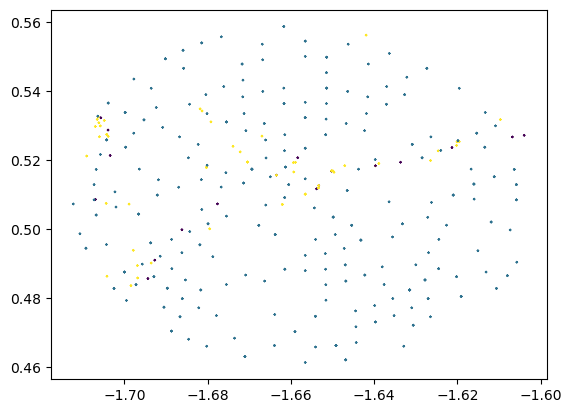

-365.9525096089156 275.83990848316347 [-1384.45501922] tensor([2.3007], dtype=torch.float64)


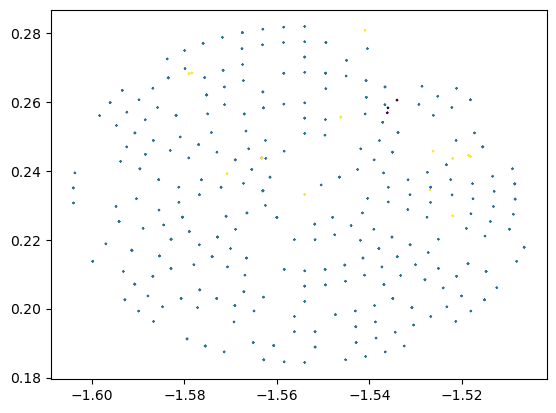

281.4941747754556 1134.2792152460345 [-7072.37665045] tensor([24.1006], dtype=torch.float64)


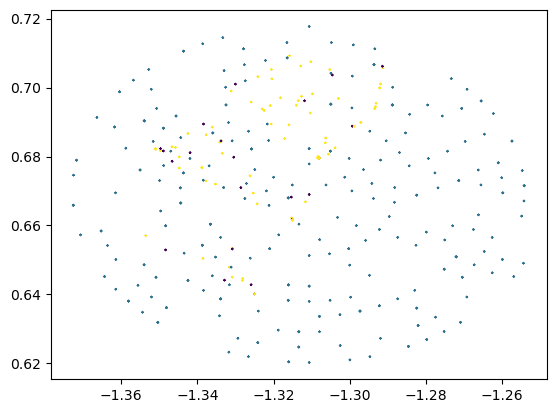

491.79447472881384 1141.327102981437 [-10299.26105054] tensor([inf], dtype=torch.float64)


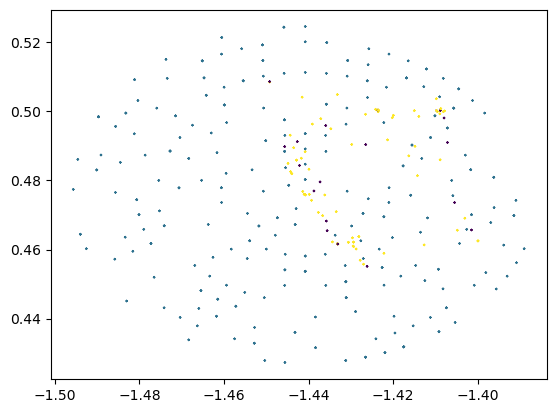

-66.05543671405871 11.81989495908276 [-167.9] tensor([0.5740], dtype=torch.float64)


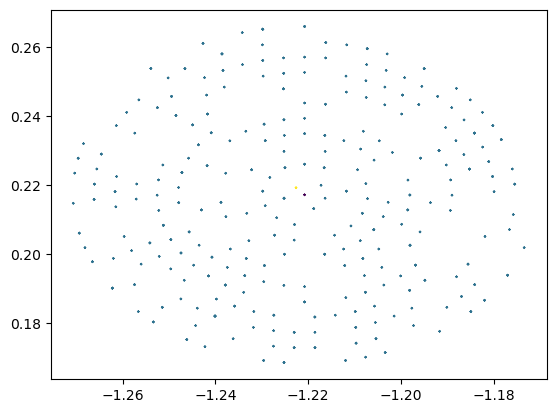

5644.258992500761 1147.7014888571157 [-2154.847015] tensor([3.8922], dtype=torch.float64)


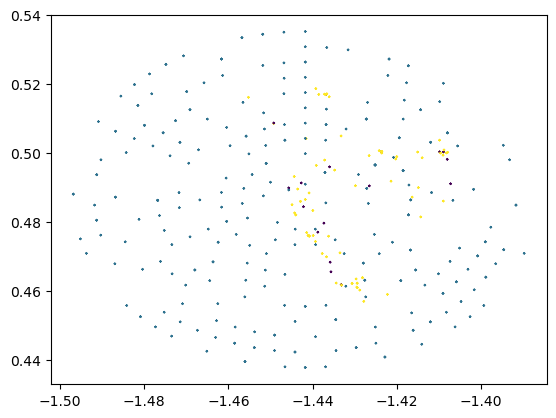

491.79447472881384 1141.327102981437 [-9224.06105054] tensor([inf], dtype=torch.float64)


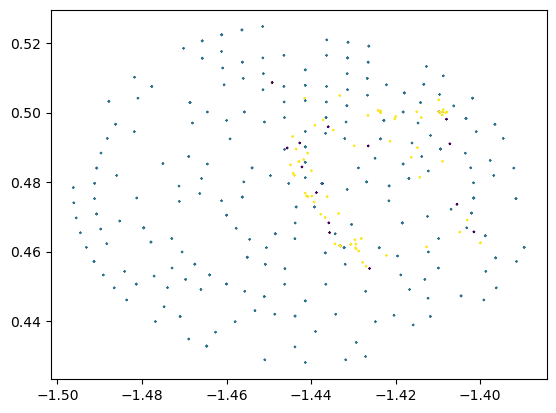

477.2437708347634 1076.7674999738801 [-3153.82495833] tensor([6.5697], dtype=torch.float64)


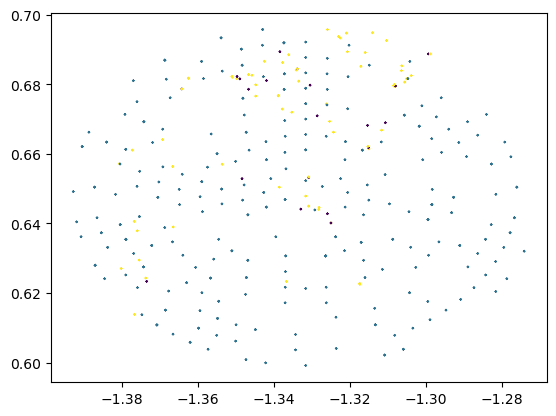

869.2928360202632 1144.5985418804714 [-10446.99682796] tensor([inf], dtype=torch.float64)


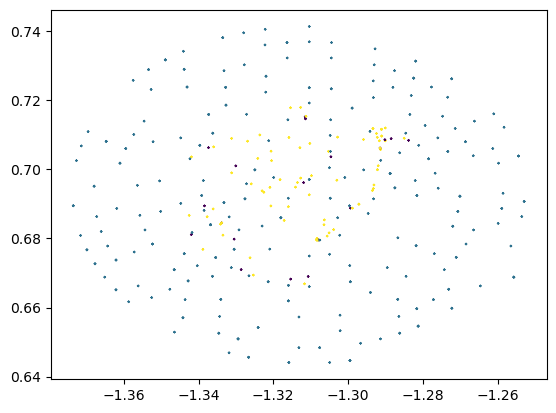

5644.258992500761 1147.7014888571157 [2396.972985] tensor([-0.6444], dtype=torch.float64)


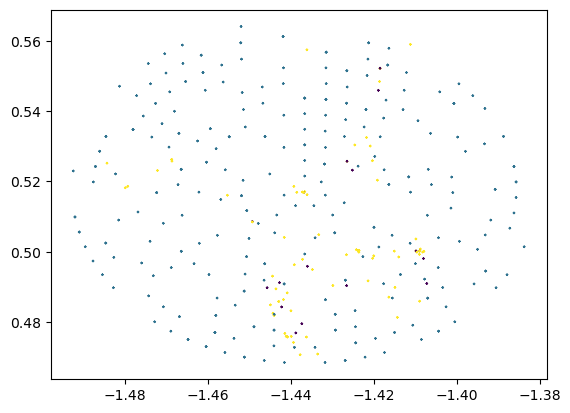

281.4941747754556 1134.2792152460345 [-7259.16165045] tensor([25.2221], dtype=torch.float64)


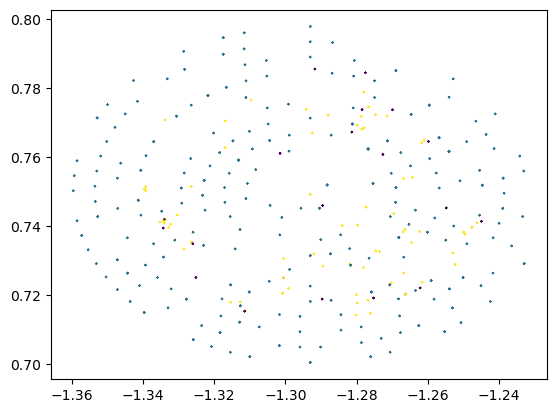

491.79447472881384 1141.327102981437 [-1929.36105054] tensor([3.3846], dtype=torch.float64)


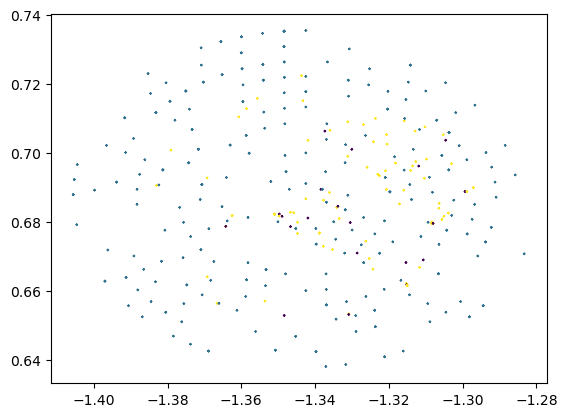

123.80130891029421 584.7146379128883 [-417.20113843] tensor([0.8538], dtype=torch.float64)


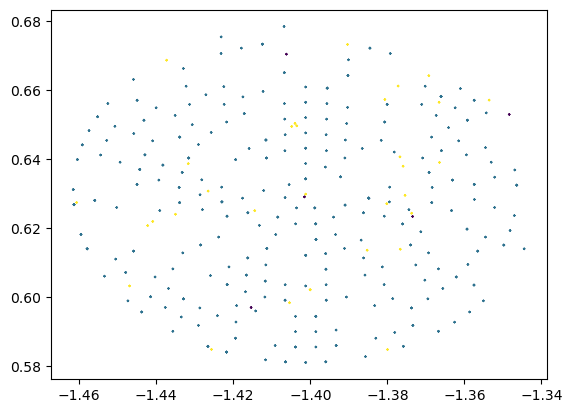

123.80130891029421 584.7146379128883 [-1101.52738218] tensor([1.8158], dtype=torch.float64)


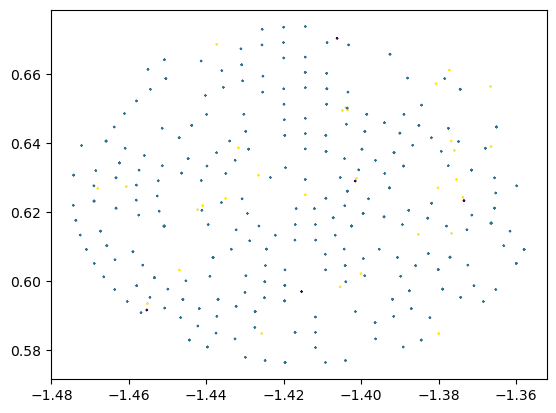

869.2928360202632 1144.5985418804714 [-9274.22182796] tensor([inf], dtype=torch.float64)


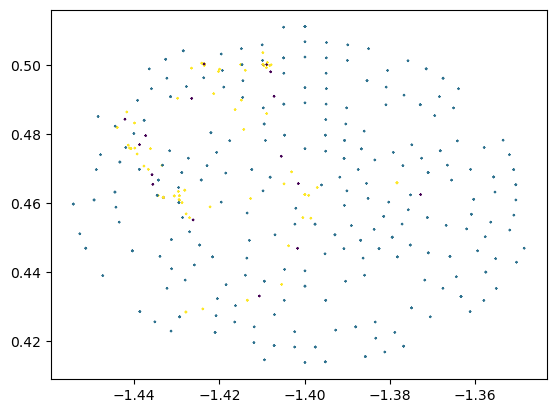

119.52160131828668 594.2399364636151 [-1431.01929736] tensor([2.3855], dtype=torch.float64)


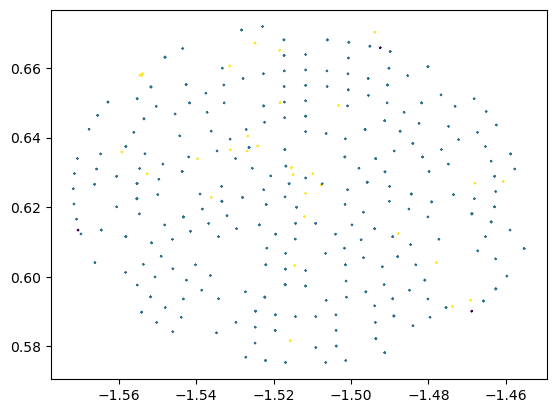

97.63088159966287 633.6708111695299 [-198.6382368] tensor([0.6066], dtype=torch.float64)


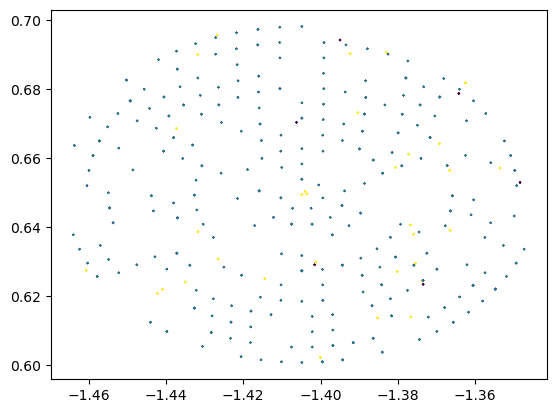

-92.62062971320483 849.2061307734714 [-1114.39125943] tensor([1.8367], dtype=torch.float64)


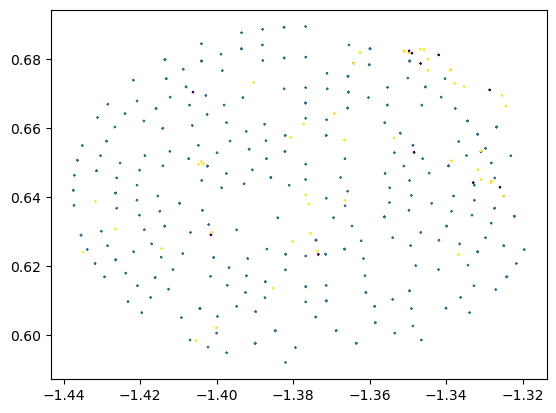

491.79447472881384 1141.327102981437 [-7183.91105054] tensor([24.7671], dtype=torch.float64)


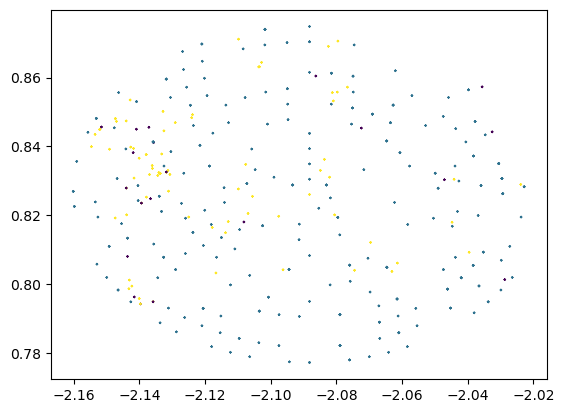

-1817.8596476718028 330.15438234329105 [-4061.35929534] tensor([9.6220], dtype=torch.float64)


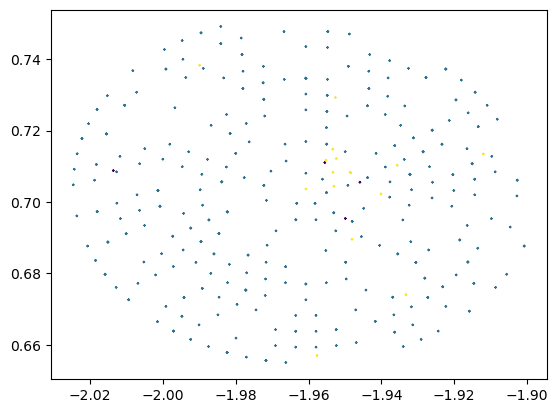

135.62790899808897 566.0034915711386 [-450.384182] tensor([0.8938], dtype=torch.float64)


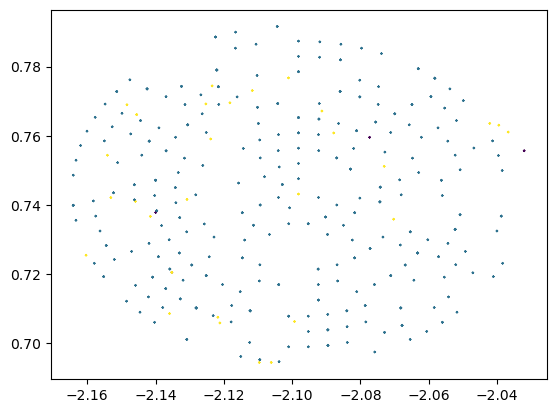

-139.86985213057687 993.0303875831194 [-9711.35437926] tensor([inf], dtype=torch.float64)


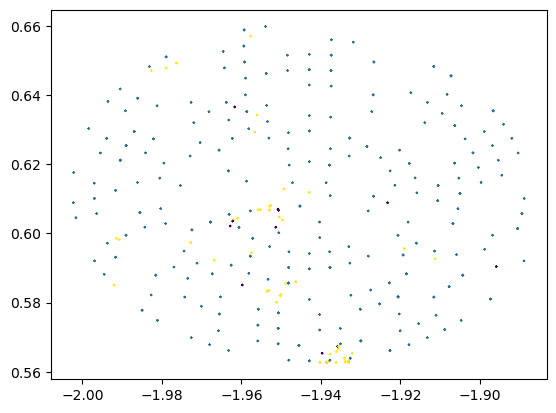

324.4186854899865 434.8878180279599 [-89.6] tensor([0.4935], dtype=torch.float64)


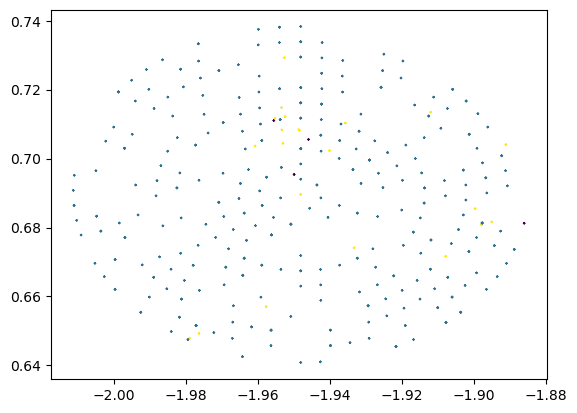

5644.258992500761 1147.7014888571157 [-1088.24714] tensor([1.7943], dtype=torch.float64)


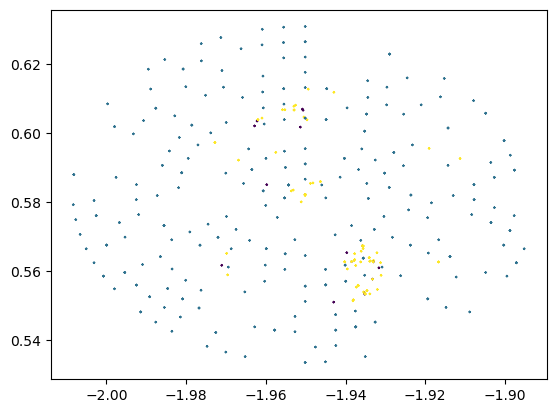

-111.98749418199395 908.4969756003594 [-10396.50623836] tensor([inf], dtype=torch.float64)


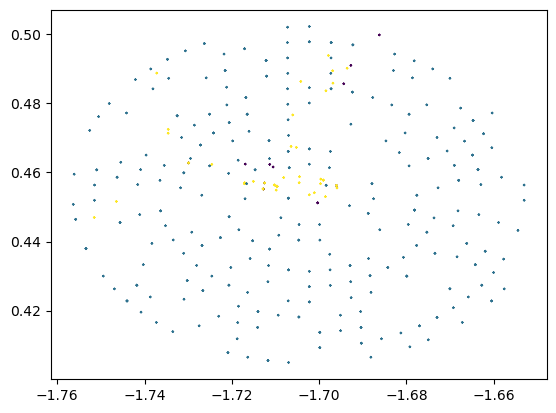

-69.38345635881342 905.8415779370501 [-10948.02002522] tensor([inf], dtype=torch.float64)


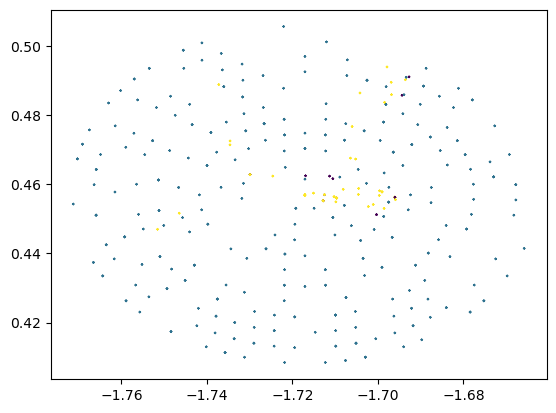

5644.258992500761 1147.7014888571157 [-1479.66714] tensor([2.4757], dtype=torch.float64)


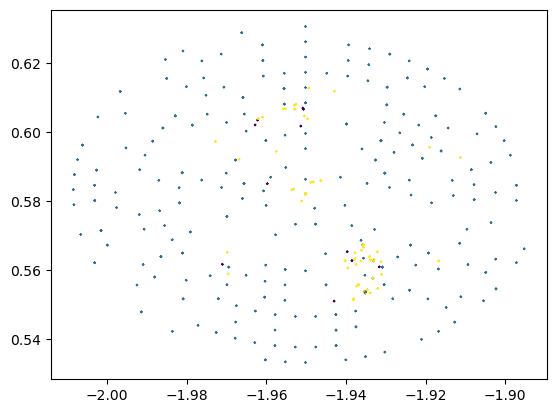

5644.258992500761 1147.7014888571157 [-1845.58214] tensor([3.2048], dtype=torch.float64)


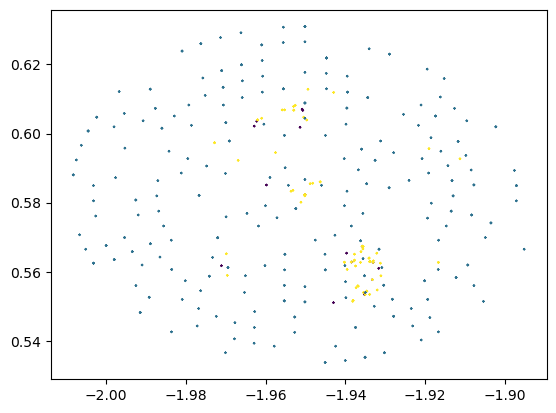

-111.98749418199395 908.4969756003594 [-12219.50623836] tensor([inf], dtype=torch.float64)


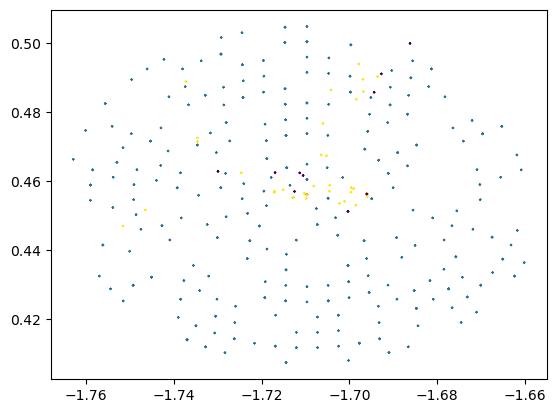

-69.38345635881342 905.8415779370501 [-9985.32502522] tensor([inf], dtype=torch.float64)


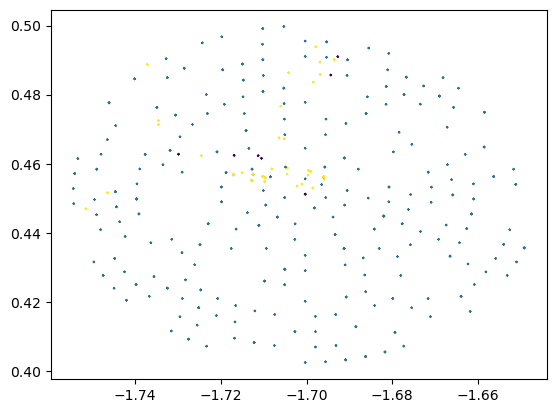

-69.38345635881342 905.8415779370501 [-9666.25502522] tensor([inf], dtype=torch.float64)


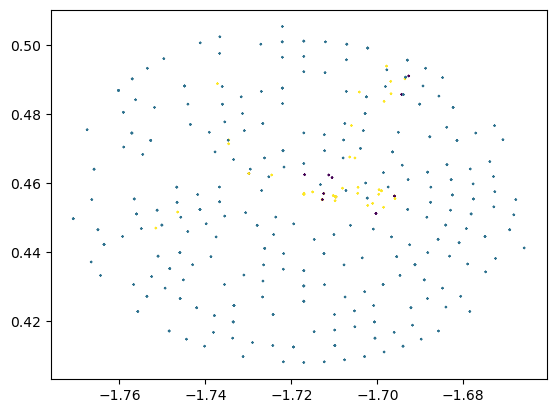

-122.80233786279814 941.7294136681354 [-10961.66212573] tensor([inf], dtype=torch.float64)


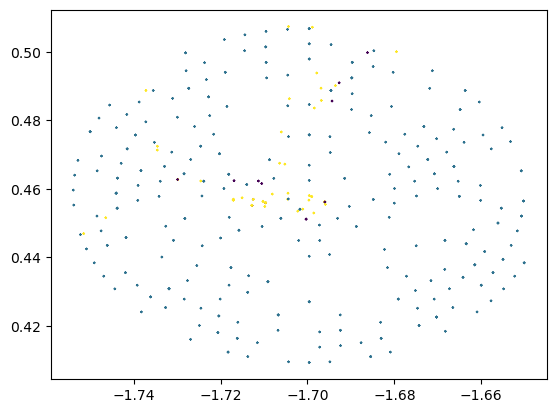

209.12735682997845 1126.5601570538167 [-9445.66528634] tensor([inf], dtype=torch.float64)


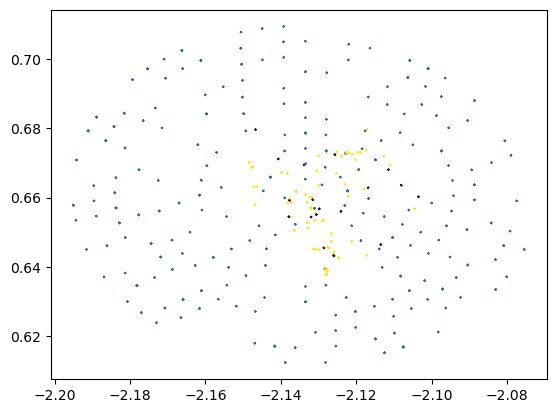

161.8813261319401 1113.7333641364487 [-7401.60734774] tensor([26.0950], dtype=torch.float64)


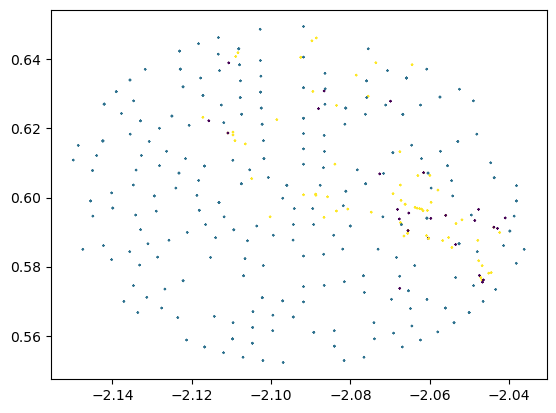

161.8813261319401 1113.7333641364487 [-5918.63734774] tensor([17.7544], dtype=torch.float64)


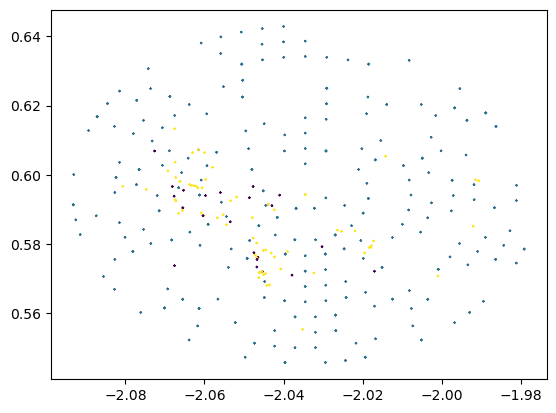

152.85953602360314 1109.1282055397562 [-5157.78092795] tensor([14.1138], dtype=torch.float64)


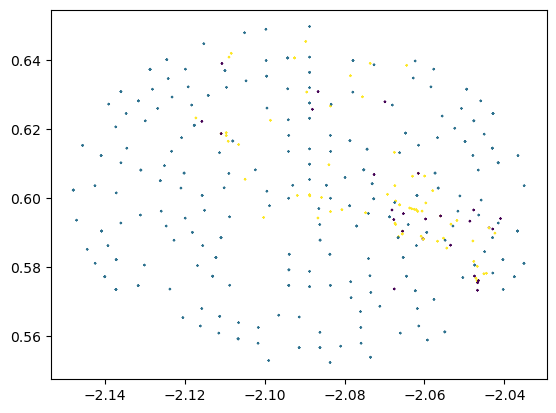

120.63830493268142 591.3399789989766 [-769.49339013] tensor([1.3126], dtype=torch.float64)


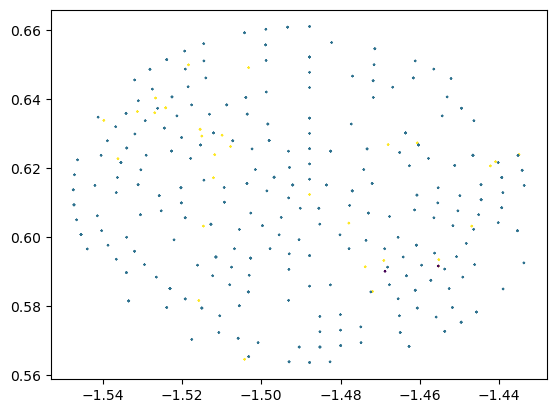

-19.110861651598043 942.4554415653826 [-9168.7467233] tensor([inf], dtype=torch.float64)


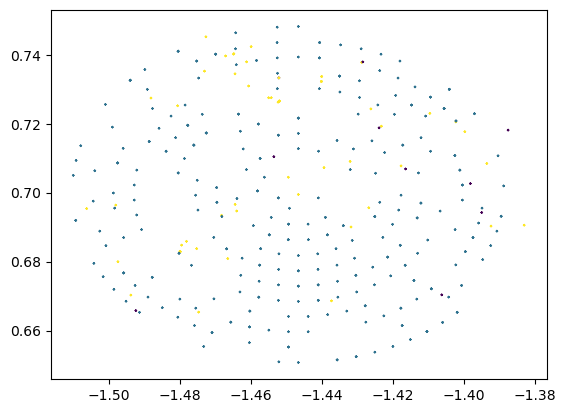

-988.9171038287132 1054.1074910775278 [-4640.56920766] tensor([11.8844], dtype=torch.float64)


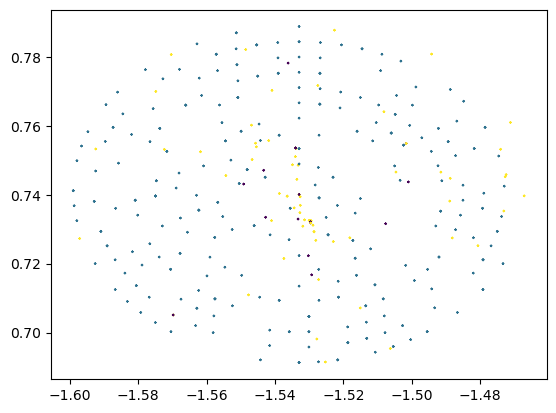

-59.63156732444122 968.2515394338394 [-6383.02313465] tensor([20.1888], dtype=torch.float64)


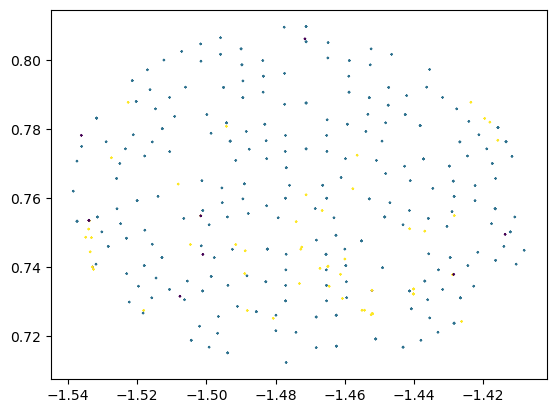

238.06818199858117 1130.5033522758772 [-6437.816136] tensor([20.4867], dtype=torch.float64)


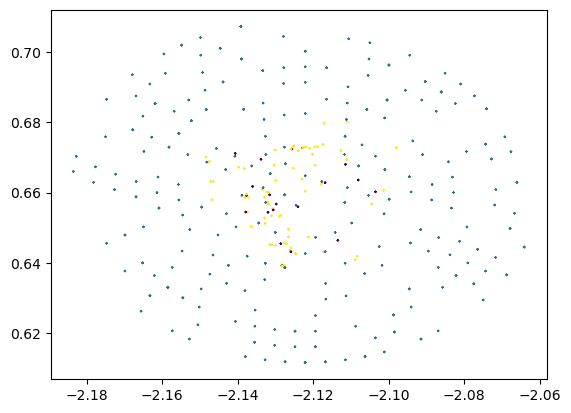

-962.332366066652 1028.208194799742 [-5951.21973213] tensor([17.9199], dtype=torch.float64)


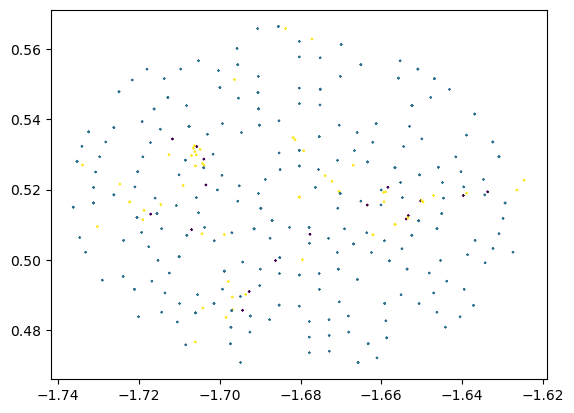

5644.258992500761 1147.7014888571157 [5348.662985] tensor([-0.6931], dtype=torch.float64)


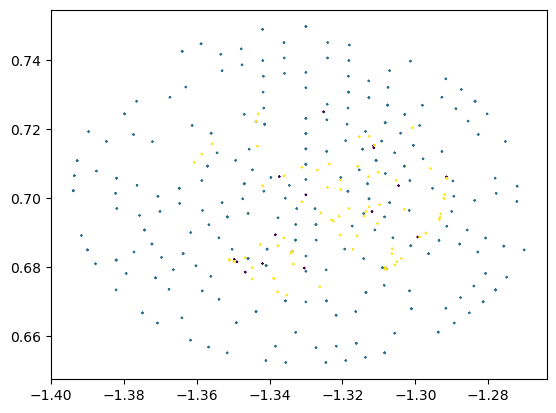

39.56573091846576 757.1036593364305 [-2720.23609441] tensor([5.3209], dtype=torch.float64)


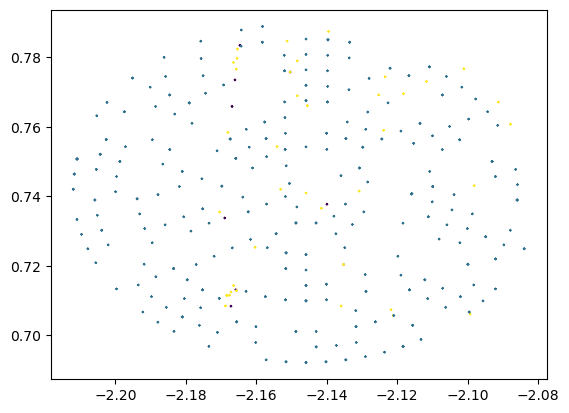

-1825.8696522272926 333.7273550476028 [-5453.7728107] tensor([15.4788], dtype=torch.float64)


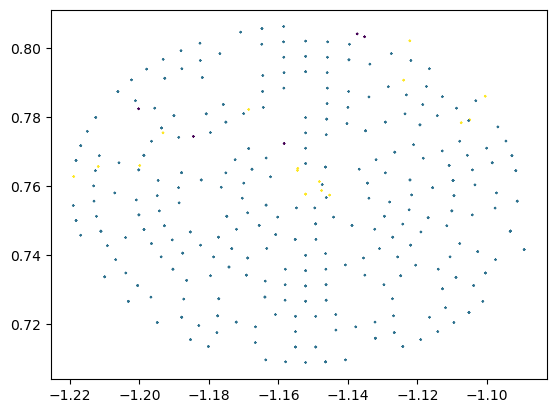

-6.114584780111272 840.8205215561828 [-3564.69166956] tensor([7.8776], dtype=torch.float64)


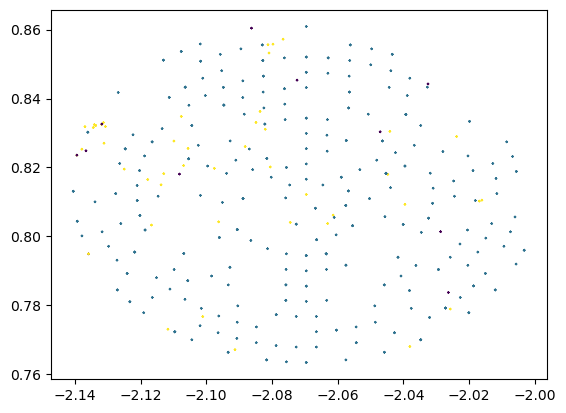

281.4941747754556 1134.2792152460345 [-5992.41165045] tensor([18.1304], dtype=torch.float64)


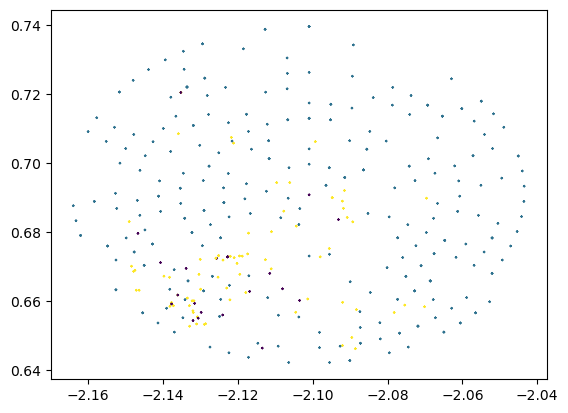

281.4941747754556 1134.2792152460345 [-10506.35665045] tensor([inf], dtype=torch.float64)


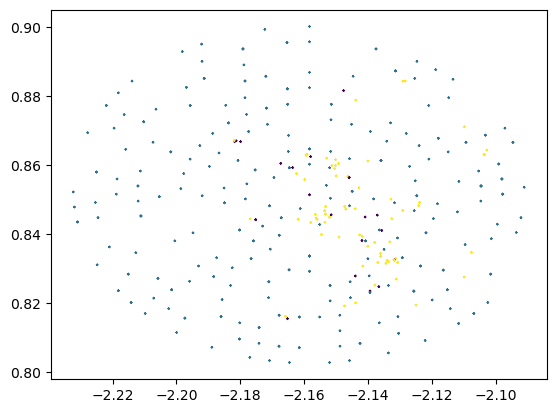

209.12735682997845 1126.5601570538167 [-8290.34528634] tensor([31.8848], dtype=torch.float64)


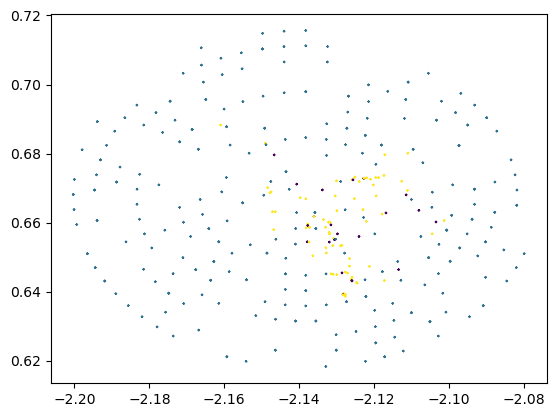

281.4941747754556 1134.2792152460345 [-3332.68867545] tensor([7.1241], dtype=torch.float64)


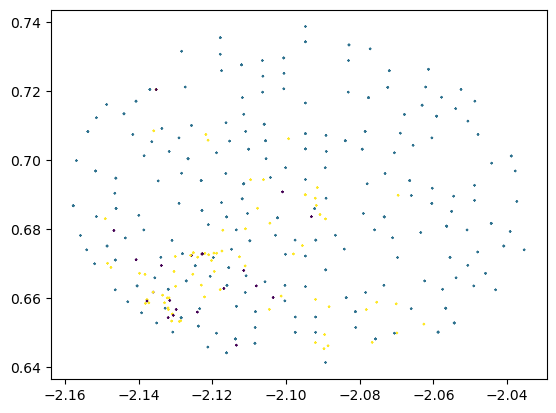

-247.25480566179158 1065.944119892959 [-11142.60133007] tensor([inf], dtype=torch.float64)


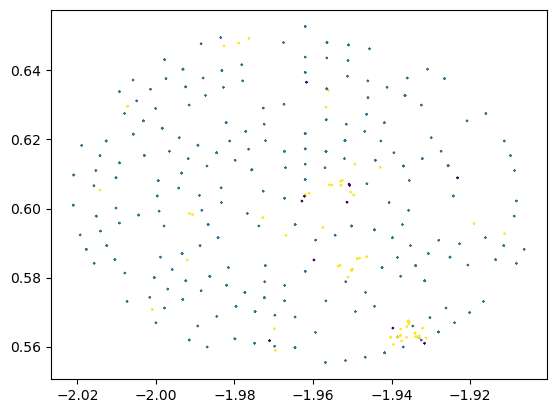

869.2928360202632 1144.5985418804714 [-12736.92435921] tensor([inf], dtype=torch.float64)


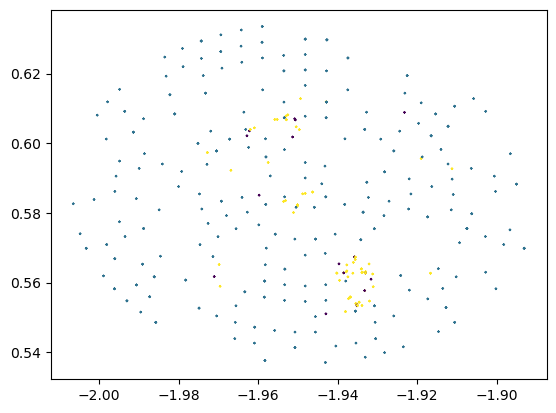

869.2928360202632 1144.5985418804714 [-14161.88584046] tensor([inf], dtype=torch.float64)


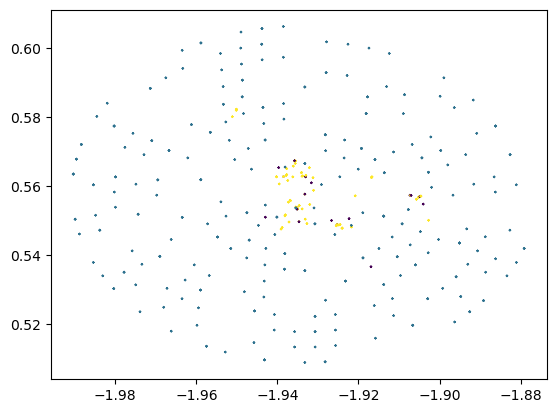

869.2928360202632 1144.5985418804714 [-13722.50834046] tensor([inf], dtype=torch.float64)


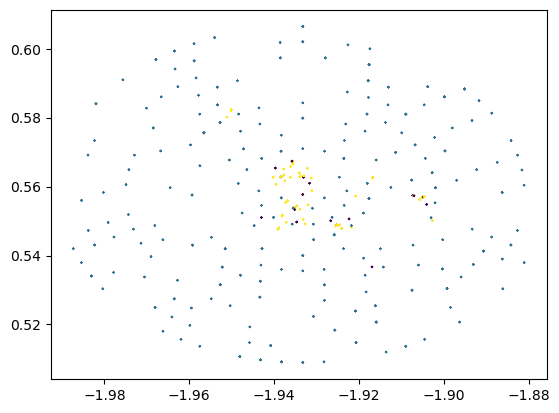

57.56283674570636 701.3738878785293 [-4067.68682651] tensor([9.6454], dtype=torch.float64)


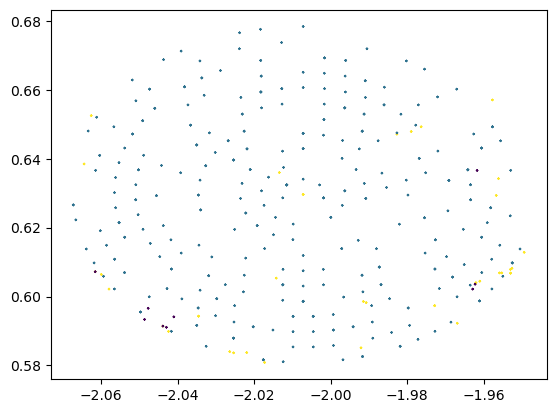

-100.62224104593601 129.99354632721196 [-114.96448209] tensor([0.5192], dtype=torch.float64)


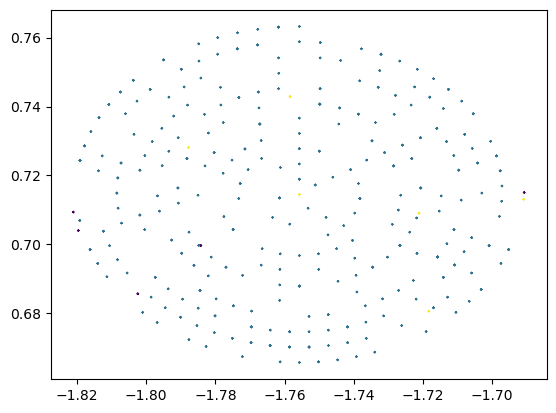

43.24887161818788 832.324924088769 [-5043.44501301] tensor([13.6039], dtype=torch.float64)


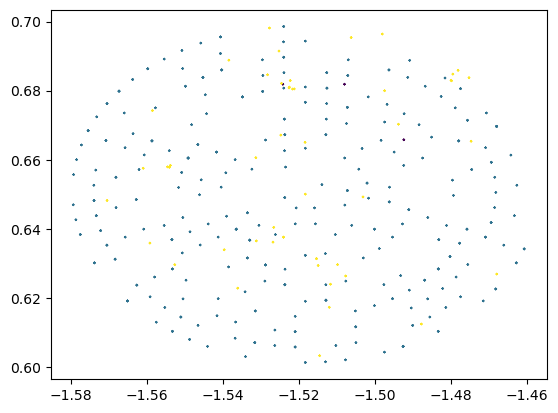

-164.2191563972588 205.5664254337877 [-1189.73831279] tensor([1.9614], dtype=torch.float64)


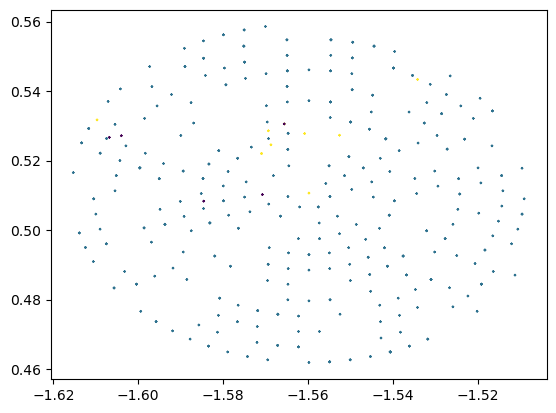

869.2928360202632 1144.5985418804714 [-12378.86932796] tensor([inf], dtype=torch.float64)


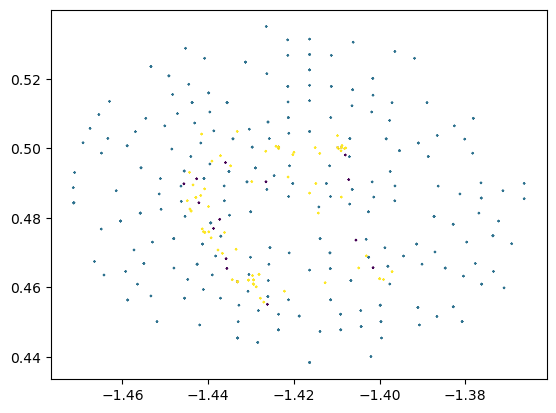

503.9912215659439 414.59818552405653 [347.37244313] tensor([0.1061], dtype=torch.float64)


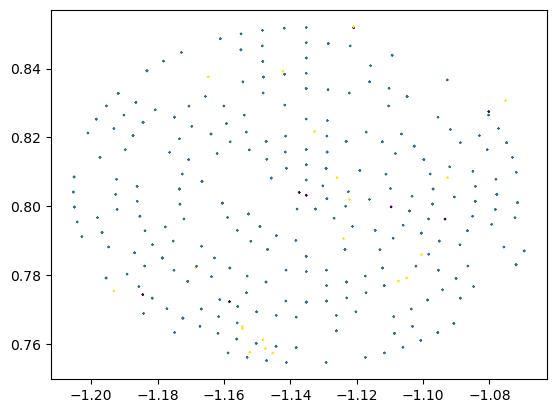

-43.815387301665396 821.283181834018 [-774.0657746] tensor([1.3191], dtype=torch.float64)


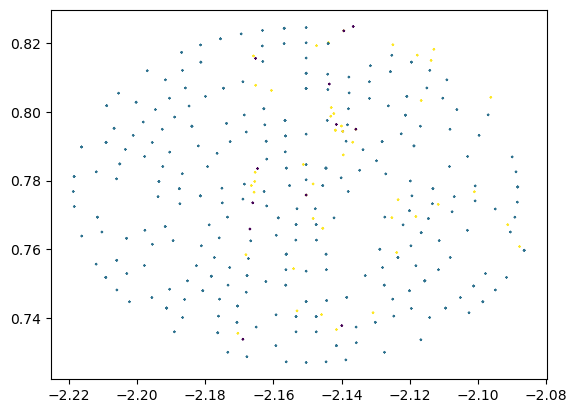

In [28]:
for idx in range(1000, 1100):
    points = loss.neighborhood_points_lookup[idx]
    loc, scale = loss.mean_lookup[idx], loss.std_lookup[idx]
    batch = loss.neighborhood_scores_lookup[idx].reshape((1, -1))
    X = batch - np.mean(batch, axis=1)
    Y = np.matmul(loss.weight_matrix_lookup[idx], X.T)

    moran_i_upper = np.matmul(X, Y).flatten()
    a, b = moran_i_upper, 2*loc - moran_i_upper
    low, high = min(a, b), max(a, b)
    
    cdf_value = 2*dist.cdf(torch.tensor(low))
    print(loc, scale, low, -np.log(cdf_value))
    plt.scatter(points[:,1], points[:,0], c=batch, s=1, marker="x")
    plt.show()

In [100]:
ll = []
for idx in range(1000, 1100):
    batch = loss.neighborhood_scores_lookup[idx].reshape((1, -1))
    weight = loss.weight_matrix_lookup[idx]
    X = batch - np.mean(batch, axis=1)
#     print(X)
#     print(weight)
#     print(weight.shape, X.shape)
    Y = np.matmul(weight, X.T)
    # print(Y[:20])
    
    # print(X.shape, Y.shape)
    moran_i_upper = np.matmul(X, Y).flatten()
    # print(moran_i_upper)
    ll.append(moran_i_upper)

In [96]:
print(einsum_result[1,:20])

[-15.01   3.99 -10.01  -8.01  39.99  27.99   8.99   8.99  27.99  20.99
  39.99  39.99  -8.01  27.99  27.99  27.99   8.99  20.99  39.99  39.99]


In [50]:
print(X.shape, weight.shape, Y.shape)

(1, 400) (400, 400) (400, 1)


In [101]:
batch = loss.neighborhood_scores_lookup[1000:1100]
X = batch - np.mean(batch, axis=1, keepdims=True)
weights = loss.weight_matrix_lookup[1000:1100]

In [66]:
print(X.shape, weights.shape)

(100, 400) (100, 400, 400)


In [102]:
einsum_result = np.einsum('bij,bj->bi',weights,X)

In [94]:
einsum_result[1,:20]

array([-15.01,   3.99, -10.01,  -8.01,  39.99,  27.99,   8.99,   8.99,
        27.99,  20.99,  39.99,  39.99,  -8.01,  27.99,  27.99,  27.99,
         8.99,  20.99,  39.99,  39.99])

In [68]:
einsum_result.shape

(100, 400)

In [103]:
moran_i_uppers = np.sum(X * einsum_result, axis=1)
# np.einsum('bi,bi->b',X,einsum_result)

In [104]:
moran_i_uppers

array([ 2.61246750e+03,  8.48906250e+03,  3.04786500e+03,  9.14065245e+03,
        8.55637500e+02,  5.10732500e+02,  1.16066300e+04,  1.26333500e+03,
       -4.87500000e-01,  7.67000000e+00,  4.91132250e+03,  3.74773001e+03,
        7.29746000e+03,  3.44560108e+03,  8.23885250e+03,  1.34424183e+04,
        2.40125000e+02,  2.05936903e+03,  1.22511662e+04,  2.86996500e+03,
        1.03348400e+04,  8.57403250e+03,  8.56752000e+03,  8.32094000e+03,
        1.38220611e+04,  3.81355000e+02,  8.57324000e+03,  1.12284483e+04,
        1.07499963e+04, -1.22500000e-01,  4.27924506e+02,  2.63408500e+03,
        4.35885000e+02,  1.24374533e+04,  1.23201200e+04,  1.27905511e+04,
        8.94935250e+03,  1.59011303e+04,  3.82071000e+03,  4.99028103e+03,
        6.52550000e+02,  7.63536500e+03,  1.12828500e+04, -1.67900000e+02,
        1.34433650e+04,  1.02076500e+04,  4.10831250e+03,  1.21855825e+04,
        8.89154500e+03,  7.82215000e+03,  2.91295000e+03,  6.64803756e+02,
        1.34913000e+03,  

In [105]:
ll

[array([2612.4675]),
 array([8489.0625]),
 array([3047.865]),
 array([9140.65245]),
 array([855.6375]),
 array([510.7325]),
 array([11606.63]),
 array([1263.335]),
 array([-0.4875]),
 array([7.67]),
 array([4911.3225]),
 array([3747.73000625]),
 array([7297.46]),
 array([3445.601075]),
 array([8238.8525]),
 array([13442.41835]),
 array([240.125]),
 array([2059.369025]),
 array([12251.16615]),
 array([2869.965]),
 array([10334.84]),
 array([8574.0325]),
 array([8567.52]),
 array([8320.94]),
 array([13822.06115]),
 array([381.355]),
 array([8573.24]),
 array([11228.44835]),
 array([10749.9963375]),
 array([-0.1225]),
 array([427.92450625]),
 array([2634.085]),
 array([435.885]),
 array([12437.45335]),
 array([12320.12]),
 array([12790.55115]),
 array([8949.3525]),
 array([15901.1303375]),
 array([3820.71]),
 array([4990.281025]),
 array([652.55]),
 array([7635.365]),
 array([11282.85]),
 array([-167.9]),
 array([13443.365]),
 array([10207.65]),
 array([4108.3125]),
 array([12185.5825]),


In [71]:
a = np.array([[1,2], [2,3], [4,1], [2,5]])
b = np.array([[[1, 0], [0, 1]], [[0, 0], [0, 0]], [[1, 0], [0, 1]], [[0, 0], [0, 0]]])

In [72]:
print(a.shape, b.shape)

(4, 2) (4, 2, 2)


In [73]:
np.einsum('bij,bj->bi',b,a)

array([[1, 2],
       [0, 0],
       [4, 1],
       [0, 0]])

In [75]:
for i in range(4):
    print(np.matmul(b[i], a[i].T))

[1 2]
[0 0]
[4 1]
[0 0]


## Loss Derivative

In [8]:
inputs = torch.tensor(loss.neighborhood_scores_lookup[1000:1100], requires_grad=True).float()

In [9]:
inputs.shape

torch.Size([100, 400])

In [10]:
model = torch.nn.Linear(400,400)

In [11]:
model.weight

Parameter containing:
tensor([[-0.0268, -0.0170,  0.0055,  ...,  0.0403,  0.0276,  0.0396],
        [-0.0011, -0.0194,  0.0334,  ...,  0.0338, -0.0346,  0.0366],
        [ 0.0165, -0.0347,  0.0023,  ..., -0.0288, -0.0231,  0.0279],
        ...,
        [-0.0003, -0.0150, -0.0188,  ...,  0.0488, -0.0066, -0.0125],
        [-0.0463, -0.0075, -0.0106,  ...,  0.0218, -0.0137, -0.0136],
        [-0.0334,  0.0445,  0.0319,  ..., -0.0025, -0.0280,  0.0386]],
       requires_grad=True)

In [12]:
batch = model(inputs)

In [13]:
batch.requires_grad

True

In [9]:
l = loss(np.arange(1000, 1100), batch).mean()

NameError: name 'batch' is not defined

In [10]:
l = loss(np.arange(1000, 1100), inputs).mean()

X, weights, Y:  True False True
moran_i_uppers:  True
locs, scales:  False False
left_tails:  True
cdf values:  True


In [11]:
l.retain_grad()
inputs.retain_grad()

In [12]:
l

tensor(482.4202, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [13]:
l.grad

In [14]:
l.backward()

In [15]:
l.grad

tensor(1., dtype=torch.float64)

In [16]:
inputs.grad

tensor([[ 2.4918e-03,  2.5804e-03,  2.4033e-03,  ..., -9.9469e-05,
         -2.8088e-05, -5.8521e-04],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-1.3351e-04,  3.0552e-03,  6.2397e-04,  ..., -6.7456e-04,
          4.5814e-04, -1.3351e-04],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 8.9697e-05,  2.5114e-03,  1.4339e-05,  ...,  7.5581e-04,
          2.1715e-04,  9.8189e-04]])